# Notebook de Análise Univariada: Entendendo os Dados de Desempenho Estudantil


Este notebook foi criado para guiar a **Análise Exploratória de Dados**, focando na **Análise Univariada**, que é o estudo de cada variável de forma isolada, tanto no caso incondicional, tanto na condicional do dataset 'Student Habits vs Academic Performance' presente no site kaggle.com.

Nosso objetivo é usar as funções de pré-processamento e análise que criamos para obter uma visão abrangente da distribuição dos nossos dados.

## 1. Configuração e Preparação do Ambiente

Antes de tudo, precisamos importar as bibliotecas e importar nossos módulos de funções.

In [1]:
# Bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from IPython.display import display
import sys
import os

# Adiciona a pasta src ao path subindo uma pasta pra achar o src.
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))  

# Funções dos módulos de pré-processamento e análise univariada.
import funcoes_pre_processamento as pp 
# 'au' é o nosso módulo de Análise Univariada e 'pp' é o do pré-processamento.
import funcoes_analise_uni as au 

# Definindo também o estilo dos gráficos:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)  

## 2. Carregar e pré-processamento

Precisamos definir o caminho para o nosso dataset e em seguida carregar o pipeline do pré-processamento feito anteriormente.

Detalhes sobre o pré-processamento se encontrão no notebook respectivo deste, aqui vamos focar apenas na análise univariada.


In [2]:
caminho_dados = "../dados/student_habits_performance.csv"

# Executando o pré processamento
df_processado = pp.executar_pre_processamento_completo(caminho_dados)

# Este dicionário vai funcionar como um manual para as nossas variáveis
df_dict = pp.obter_dicionario_de_dados()

if df_processado is not None:
    print("Dados processados com sucesso")
    display(df_processado.head())

Dados carregados com sucesso.
Nulos em 'parental_education_level' preenchidos com MODA: 'High School'
Nenhuma linha duplicada encontrada.
Coluna 'performance_class' criada a partir de 'exam_score'.
Arquivo salvo em: /home/natan/Área de trabalho/HW1-ICA/dados/student_habits_preprocessed.csv
Dados processados com sucesso


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance_class
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Recuperação
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Excelente
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Reprovado
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Reprovado
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Recuperação


O dataset pré-processado foi salvo na pasta 'dados', note que os dados ainda não tiveram seus outliers removidos. Outliers são dados extremos que desviam significamente da maioria dos outros valores do nosso conjunto e podem atrapalhar a nossa análise. Felizmente no pré processamento foi implementado uma função para a remoção desses.

# 3. Outliers e Separação de Váriaveis

Mas existe um detalhe, a gente só pode remover outliers de variáveis que sejam quantitativas já que o conceito de outlier é um valor que se distancia dos demais, o que poderíamos ter é dados qualitativos que tivessem uma frequência muito baixa das demais ou então tivesse um dado escrito com um erro de digitação, o que não vem a tona pra realidade do nosso dataset.

Para termos essa separação de variáveis quantitativas e qualitativas vamos usar a primeira função feita no código das funções de análise univariada, que é a *separar_variaveis*, a lógica de como ela foi implementada se encontra nos comentários da função presentes em funcoes_analise_uni.py, mas ela basicamente divide as nossas variáveis em quantitativas e qualitativas além de remover a que não contribui como preditor (student_id), a nossa variável alvo (exam_score) e a que será usada na análise condicional(perfomance_class).

In [3]:
quantitativas, qualitativas = au.separar_variaveis(df_dict)

print("Variáveis quantitativas:")
print(quantitativas)
print("\nVariáveis qualitativas:")
print(qualitativas)

Variáveis quantitativas:
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

Variáveis qualitativas:
['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


Observamos então a existência de 8 variáveis quantitativas e 6 qualitativas, e elas fazem sentido com os seus nomes, tipo gender não ser um valor, mas sim um nome (female/male/other) e age não ser um nome mas sim um número (21,22,23...).

Com isso em mente vamos agora remover os outliers com a função de pré-processamento remover_outliers para cada uma dessas variáveis quantitativas, vamos começar mostrando a eliminação visual deles usando uma variável de exemplo, como a social_media_hours: 

Antes da remoção dos outliers em social_media_hours 
Contagem de linhas original: 1000


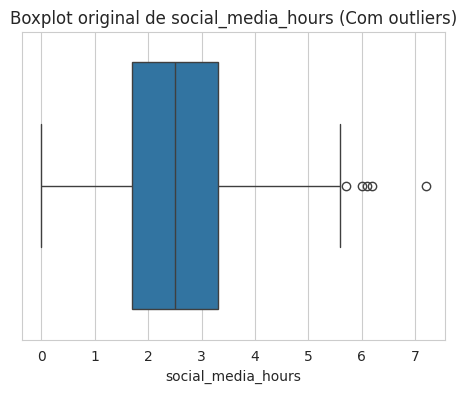

In [4]:
variavel_exemplo = 'social_media_hours'

print(f"Antes da remoção dos outliers em {variavel_exemplo} ")
print(f"Contagem de linhas original: {len(df_processado)}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_processado[variavel_exemplo])
plt.title(f'Boxplot original de {variavel_exemplo} (Com outliers)')
plt.show()

Como podemos perceber, existem 5 bolinhas brancas no canto direito do boxplot, representando os outliers dessa variável. Podemos então aplicar a seguinte função:

In [5]:
df_sem_outliers = pp.remover_outliers(df_processado, variavel_exemplo)

Agora, repetindo a plotagem:

Depois da remoção dos outliers em social_media_hours ---
Contagem de linhas após remoção: 995
Linhas removidas: 5


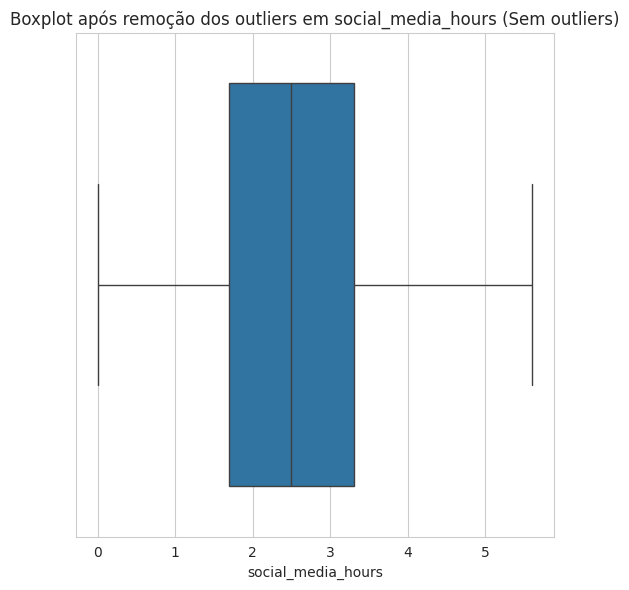

In [6]:
print(f"Depois da remoção dos outliers em {variavel_exemplo} ---")
print(f"Contagem de linhas após remoção: {len(df_sem_outliers)}")
print(f"Linhas removidas: {len(df_processado) - len(df_sem_outliers)}")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_sem_outliers[variavel_exemplo])
plt.title(f'Boxplot após remoção dos outliers em {variavel_exemplo} (Sem outliers)')
plt.tight_layout()
plt.show()

Como podemos perceber, os outliers sumiram, agora basta fazer isso para todas as nossas variáveis quantitativas.

In [7]:
df_limpo = df_processado.copy()  # Preserva o original.

for coluna in quantitativas:     # A gente obteve isso aqui lá em cima na função de separar variáveis.
    df_limpo = pp.remover_outliers(df_limpo, coluna)


# 4. Estatísticad Descritivas

In [8]:
print("[TABELA] Estatísticas Descritivas para Variáveis Quantitativas:")
estatisticas_quant = au.estatisticas_descritivas_quantitativas(df_limpo, quantitativas)
display(estatisticas_quant)

[TABELA] Estatísticas Descritivas para Variáveis Quantitativas:


,Contagem,Mínimo,Máximo,Média,Mediana,Desvio Padrão,Assimetria
age,979.0,17.0,24.0,20.501532,20.0,2.309567,0.004524
study_hours_per_day,979.0,0.0,7.3,3.520327,3.5,1.439092,-0.053408
social_media_hours,979.0,0.0,5.6,2.483146,2.5,1.149425,0.000016
netflix_hours,979.0,0.0,4.6,1.803984,1.8,1.057254,0.168719
attendance_percentage,979.0,59.5,100.0,84.127681,84.3,9.314441,-0.187444
sleep_hours,979.0,3.2,9.8,6.463841,6.5,1.220036,0.055033
exercise_frequency,979.0,0.0,6.0,3.036772,3.0,2.025572,-0.026471
mental_health_rating,979.0,1.0,10.0,5.436159,5.0,2.853757,0.037740


As estatísticas descritivas possuem: Contagem, Mínimo, Máximo, Média, Mediana, Desvio Padrão e Assimetria, e juntas revelam um perfil claro dos estudantes: a média de idade sendo de 20.501532 anos, com frequência às aulas de 84.127681% e uma rotina de estudo de 3.520327 horas por dia além de outras estatísticas como podemos ver na tabela. Com isso, vemos um equilíbrio entre estudo e lazer dos estudantes, onde eles ocupam mais do seus tempos com redes sociais (2.483146 horas) e assistindo Netflix (1.803984 horas) do que com os estudos (o que é entendível para jovens dessa faixa etária). Além disso, dormem em média 6.463841 horas por noite (abaixo do ideal, refletindo a rotina cansativa da universidade), se exercitam em média 3 vezes por semana e avaliam sua saúde mental como 5.436159 de 10 (enfantizando o desgaste mental de muitos estudantes). Também, não observamos uma assimetria muito distante de zero (como maior que 0.5 ou menor que -0.5), o que indicaria uma distribuição assimétrica (por exemplo, se social_media_hours tiver alta assimetria positiva longe do zero, significa que a maioria dos alunos passa pouco tempo em redes sociais, ou seja, teria uma concentração fora do centro mais pra esquerda). Essas métricas são usadas apenas para variáveis quantitativas porque elas representam grandezas mensuráveis, permitindo cálculos de tendência central e dispersão, o que não ocorre com as variáveis qualitativas, por serem categóricas e sem ordem numérica, não permitem operações matemáticas como média ou desvio padrão, sendo melhor resumidas por frequências e proporções e é o que vamos abordar na seguinte função:

In [9]:
print("[TABELAS] Estatísticas Descritivas para Variáveis Qualitativas:")
desc_qual = au.estatisticas_descritivas_qualitativas(df_limpo, qualitativas)

# Iteramos sobre o dicionário pra mostrar por partes cada variável:
for col, tabela in desc_qual.items():
    print(f"\nVariável: {col}")
    display(tabela)

[TABELAS] Estatísticas Descritivas para Variáveis Qualitativas:

Variável: gender


,Contagem,Proporção (%)
gender,,
Female,469,47.906027
Male,469,47.906027
Other,41,4.187947



Variável: part_time_job


,Contagem,Proporção (%)
part_time_job,,
No,770,78.651685
Yes,209,21.348315



Variável: diet_quality


,Contagem,Proporção (%)
diet_quality,,
Fair,430,43.922370
Good,371,37.895812
Poor,178,18.181818



Variável: parental_education_level


,Contagem,Proporção (%)
parental_education_level,,
High School,471,48.110317
Bachelor,344,35.137896
Master,164,16.751788



Variável: internet_quality


,Contagem,Proporção (%)
internet_quality,,
Good,438,44.739530
Average,383,39.121553
Poor,158,16.138917



Variável: extracurricular_participation


,Contagem,Proporção (%)
extracurricular_participation,,
No,667,68.130746
Yes,312,31.869254


As estatísticas descritivas das qualitativas apresentam um agrupamento de valores repetidos em grupos e não apresentam métricas númericas como as quantitativas, essa função serve para observamos a frequência (proporção) das nossas variáveis categóricas no nosso dataset. Analisando a tabela, observamos uma proporção igual de homens e mulheres (469 pessoas cada), a grande maioria não tem um emprego de meio período(78.6%), uma minoria tem uma dieta de qualidade pobre (18.18%), quase metade dos pais dos estudantes só têm o ensino médio concluído (48.11%), quase metade (44.73%) tem uma internet de boa qualidade e por fim a grande maioria não está em atividades extracurriculares(68.13%).

# 5. Análise Univariada Incondicional Quantitativa

Agora, a parte mais esperada, vamos criar matrizes que agrupam os gráficos de todas as nossas variáveis, incondicional e condicionalmente.

Vamos começar com a matriz de gráficos de histogramas e boxplots univariados quantitativos:

[GRÁFICOS] Matriz de Gráficos Univariados Quantitativos (Histograma e Boxplot):


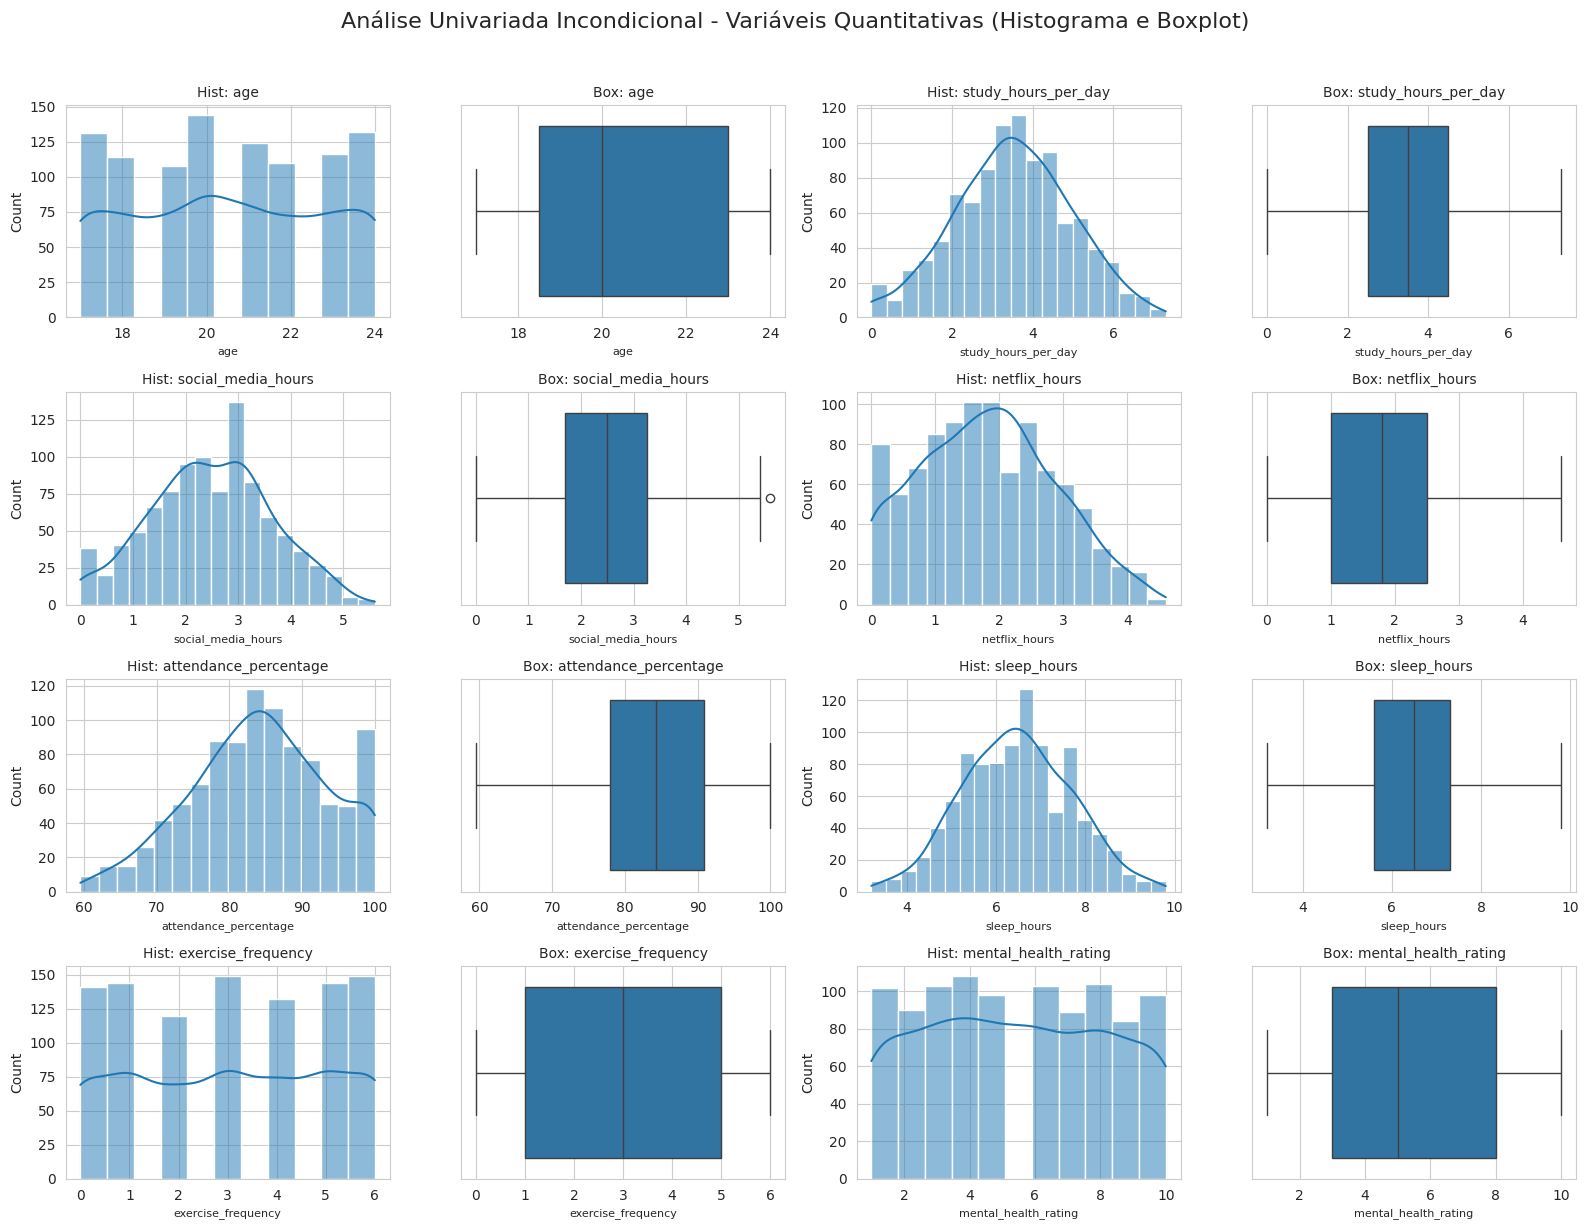

In [10]:
print("[GRÁFICOS] Matriz de Gráficos Univariados Quantitativos (Histograma e Boxplot):")
au.plot_matriz_univariada_quantitativa(df_limpo, quantitativas)

Observação: note que mesmo após a remoção dos outliers via regra de tukey (IQR), um ponto extremo permaneceu visível no boxplot. Isso se deu pois, após a remoção dos valores mais extremos, os quartis foram recalculados em cada loop e o valor restante passou a estar dentro do novo limite. Visualmente ele pode parecer um outlier mas estatisticamente não é mais considerado um valor atípico.
Observação: lacunas não refletem erros, apenas mostra que um valor não foi relatado, isso ocorre mais em valores que são números inteiros como age ou exercise_frequency.

Analisando os gráficos, percebemos que as distribuições variam entre padrões mais simétricos, como em study_hours_per_day e sleep_hours, indicando hábitos mais uniformes entre os estudantes, e distribuições mais dispersas, como em exercise_frequency e mental_health_rating, que sugerem maior diversidade de comportamentos e percepções individuais.

Mais especificamente temos: 

- **age**

Distribuição relativamente uniforme entre 18 e 24 anos, sem grandes concentrações mostrando ser uma amostra bem distribuída em termos de idade.

- **social_media_hours**

Tendência levemente concentrada entre 2 e 4 horas. Observamos um pico mais alto próximo das 3 horas, sugerindo um hábito comum entre os estudantes.

- **study_hours_per_day**

Aparece com formato próximo ao de uma distribuição normal, centrada em torno de 3 a 4 horas diárias, o que mostra um padrão consistente de estudo entre os participantes.

- **netflix_hours**

Também apresenta um padrão suave, mas com maior variação. Indica que o tempo de lazer com streaming é mais heterogêneo.

- **attendance_percentage**

Distribuição concentrada entre 75% e 95%, o que sugere um grupo com boa assiduidade às aulas.

- **sleep_hours**

Formato bem definido, com maioria dormindo de 6 a 8 horas. Demonstra rotina de sono razoavelmente equilibrada (um pouco pra menos do que pra mais).

- **exercise_frequency**

Uma das variáveis mais irregulares, há bastante variação em quantas vezes os estudantes se exercitam, indo de zero até práticas quase todo dia.

- **mental_health_rating**

Distribuição ampla. Mostra que o estado mental dos estudantes não segue um padrão único, variando bastante e a presença de uma uniformidade em notas baixas é um ponto preocupante observado.

# 6. Análise Univariada Incondicional Qualitativa

Para variáveis não numéricas (categóricas), a análise univariada incondicional é feita
por meio de contagem de frequências em gráficos de barras, ou seja, para todas as variáveis categórias (com exceção de exam\_score que foi dividida em 4 categorias para ser futuramente usada como target na análise condicionada à classe), terá uma barra de um valor único observado no dataset, se fossemos o exam\_score sem essa divisão nós teríamos um gráfico de barras com *muitas* barras dado que as notas podem ir de 0.0 até 100.0. Logo, fazemos:


[GRÁFICOS] Matriz de Gráficos Univariados Qualitativos (Gráfico de Barras):


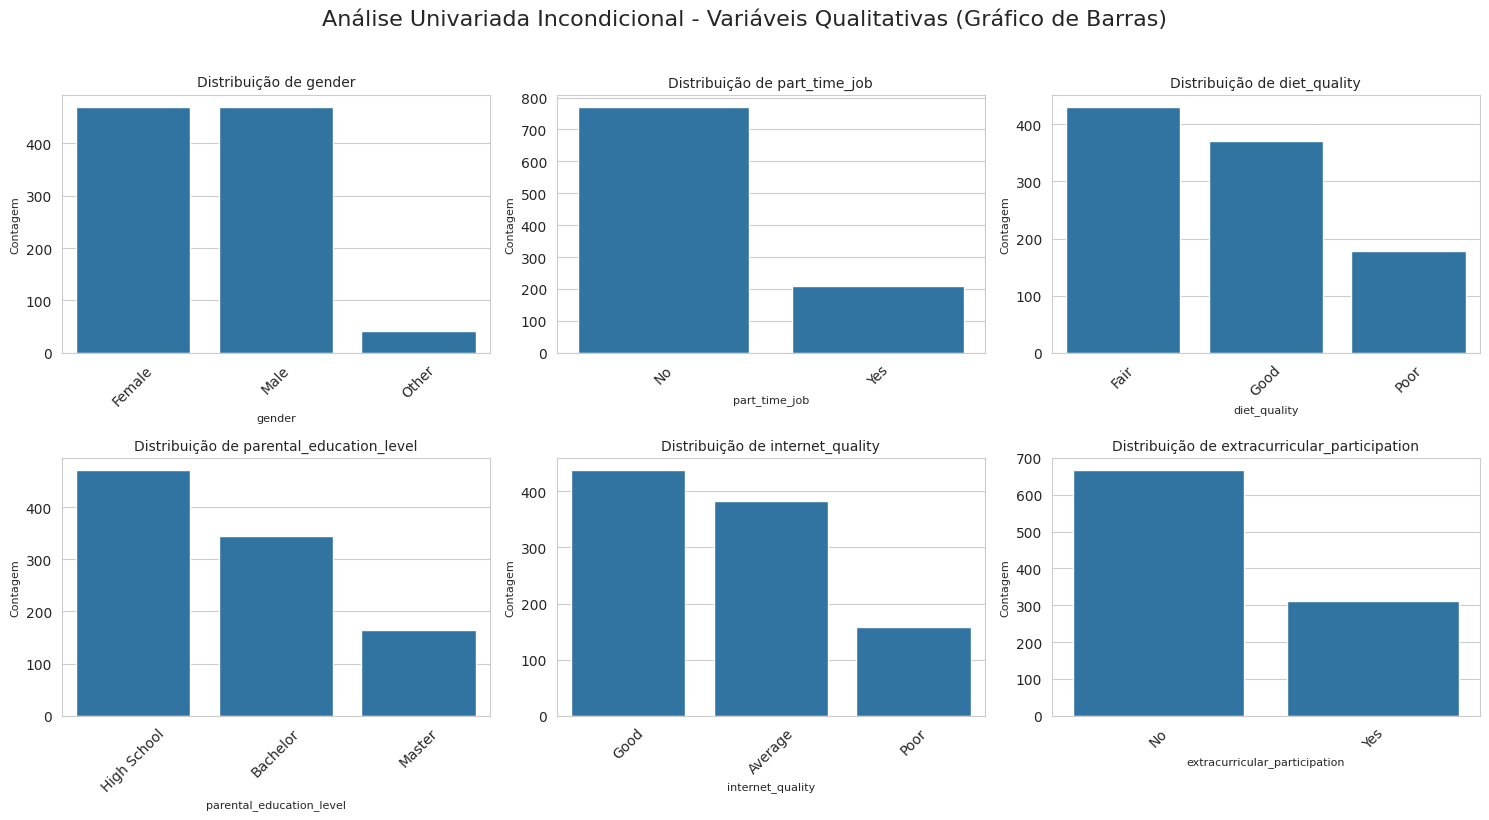

In [11]:
print("\n[GRÁFICOS] Matriz de Gráficos Univariados Qualitativos (Gráfico de Barras):")
au.plot_matriz_univariada_qualitativa(df_limpo, qualitativas)

Observando os gráficos, percebemos uma distribuição das categorias presentes em cada variável categórica do nosso dataset. No geral, percebemos que algumas características dos estudantes são bem predominantes, enquanto outras são mais equilibradas.

- **gender**

A distribuição entre Female e Male é perfeitamente equilibrada aqui (sem a remoção dos outliers perceberíamos uma maior predominância feminina). A categoria Other aparece muito pouco, o que indica uma baixa representatividade de gênero não binário ou outra identidade de gênero.

- **part_time_job**

A maioria dos estudantes não possui emprego de meio período, o que mostra que os estudantes estão mais focados exclusivamente nos estudos do que com trabalho.

- **diet_quality**

A qualidade da dieta é majoritariamente classificada como Fair ou Good sendo a Poor a menos frequente, mostrando que, em geral, os estudantes têm hábitos alimentares medianos a bons.

- **parental_education_level**

O nível de escolaridade dos pais se concentra em High School (ensino médio) e Bachelor (bacharelado). A categoria Master(mestrado) aparece com menor frequência, indicando que pais com alta escolaridade são minoria nesse grupo.

- **internet_quality**

A maioria relata internet Good ou Average, o que sugere acesso razoável à uma internet boa/média. a categoria Poor  também está presente, mas em menor escala, representando aqueles com dificuldades de estudo online.

- **extracurricular_participation**

A maior parte dos estudantes não participa de atividades extracurriculares. Isso pode indicar uma falta de tempo, interesse ou oportunidades. Uma parcela menor, participa, representando aqueles engajados em atividades além da sala de aula.

# 7. Análise Univariada Condicional Quantitativa
Agora, vamos analisar as mesmas variáveis numéricas mas separadas
de acordo com a variável de classe 'Performance' vinda do agrupamento de exam\_score.
Isso permite identificar diferenças entre os grupos, ou seja, poderíamos ter por exemplo um gráfico que mostrasse as horas de estudo condicionadas à categoria "Reprovado" e nele observaríamos um "pico" da frequência com uma quantidade de horas pequena. indicanto uma relação óbvia de quanto menos horas de estudo -> maior frequência na categoria de "Reprovado"


[GRÁFICOS] Matriz de Boxplots e Histogramas Condicionais (Variáveis Quantitativas vs performance_class):


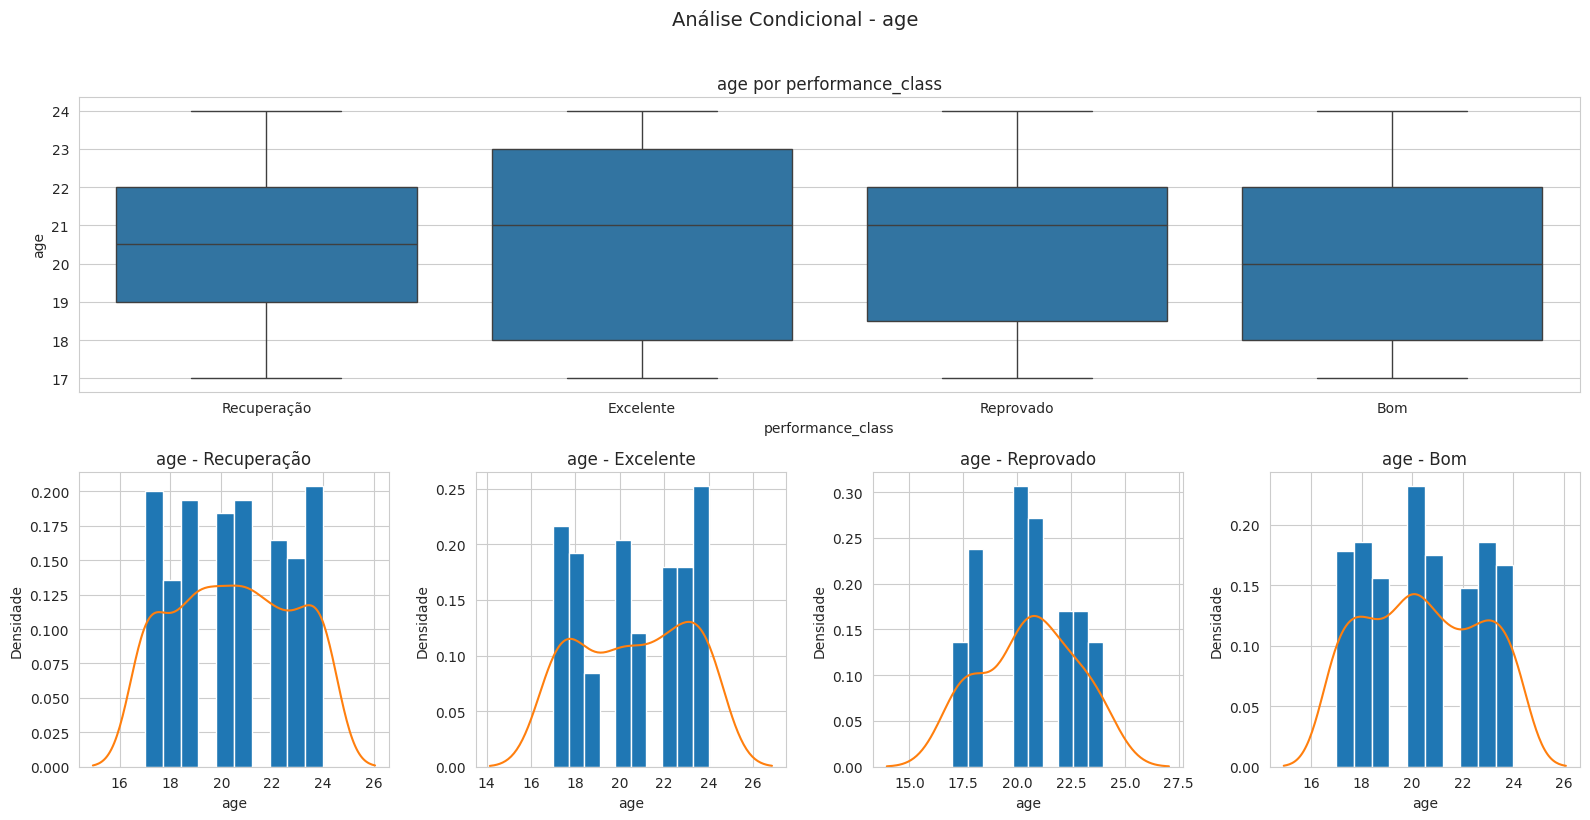

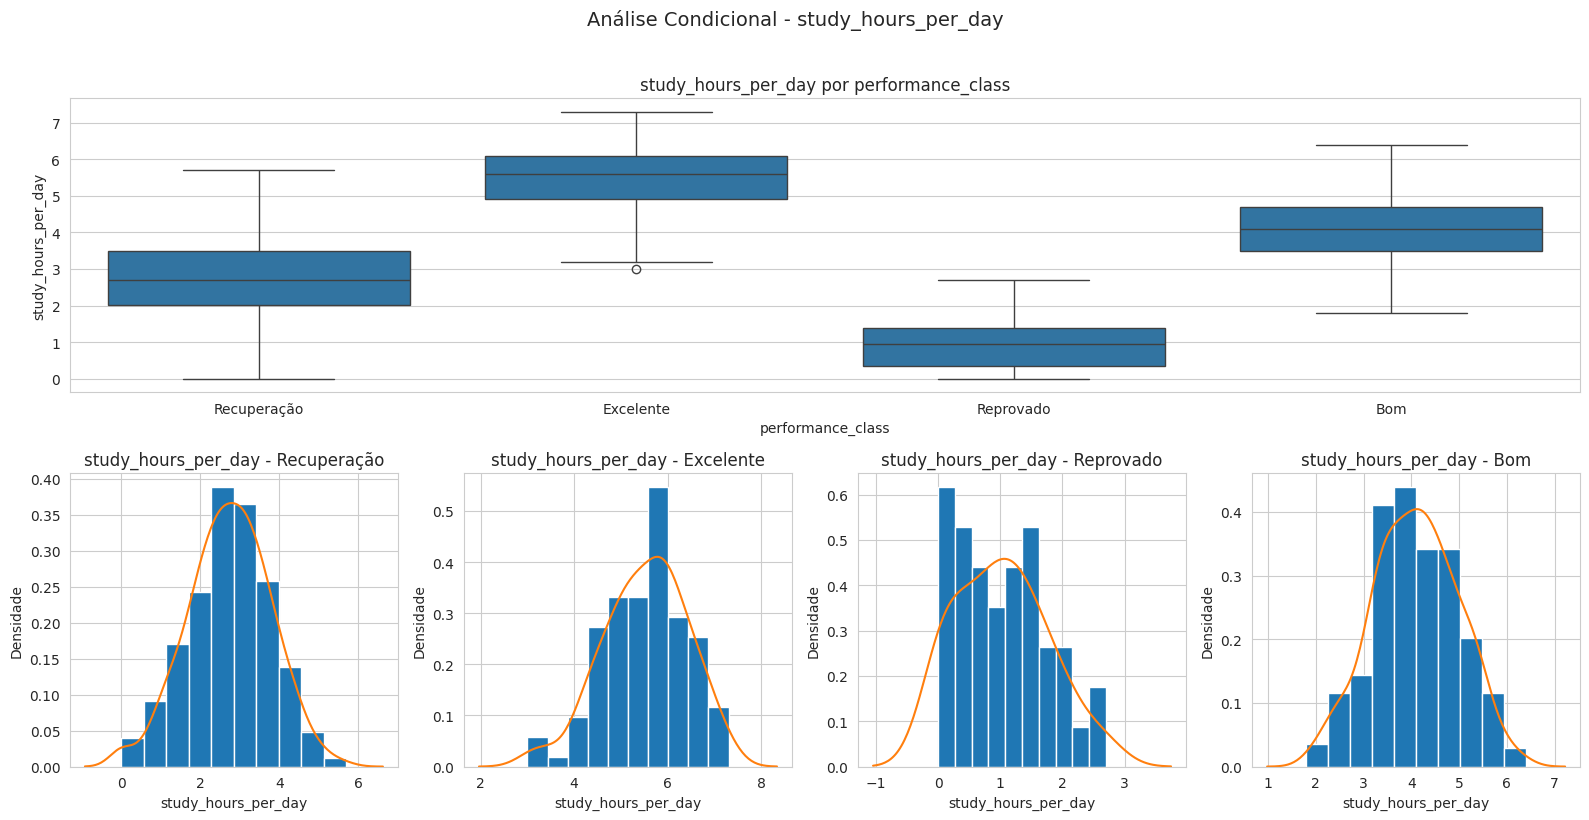

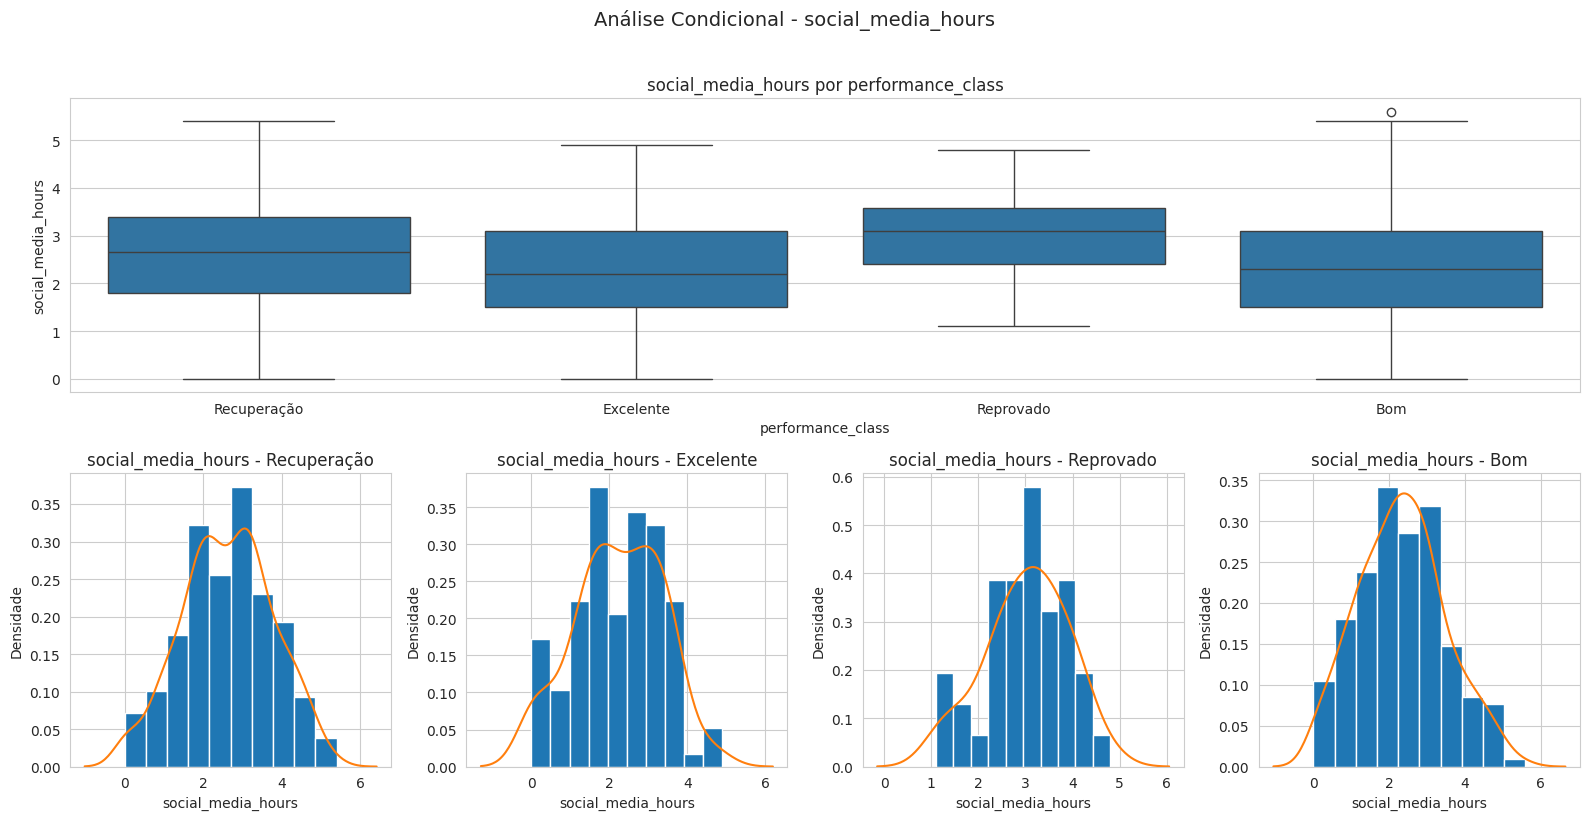

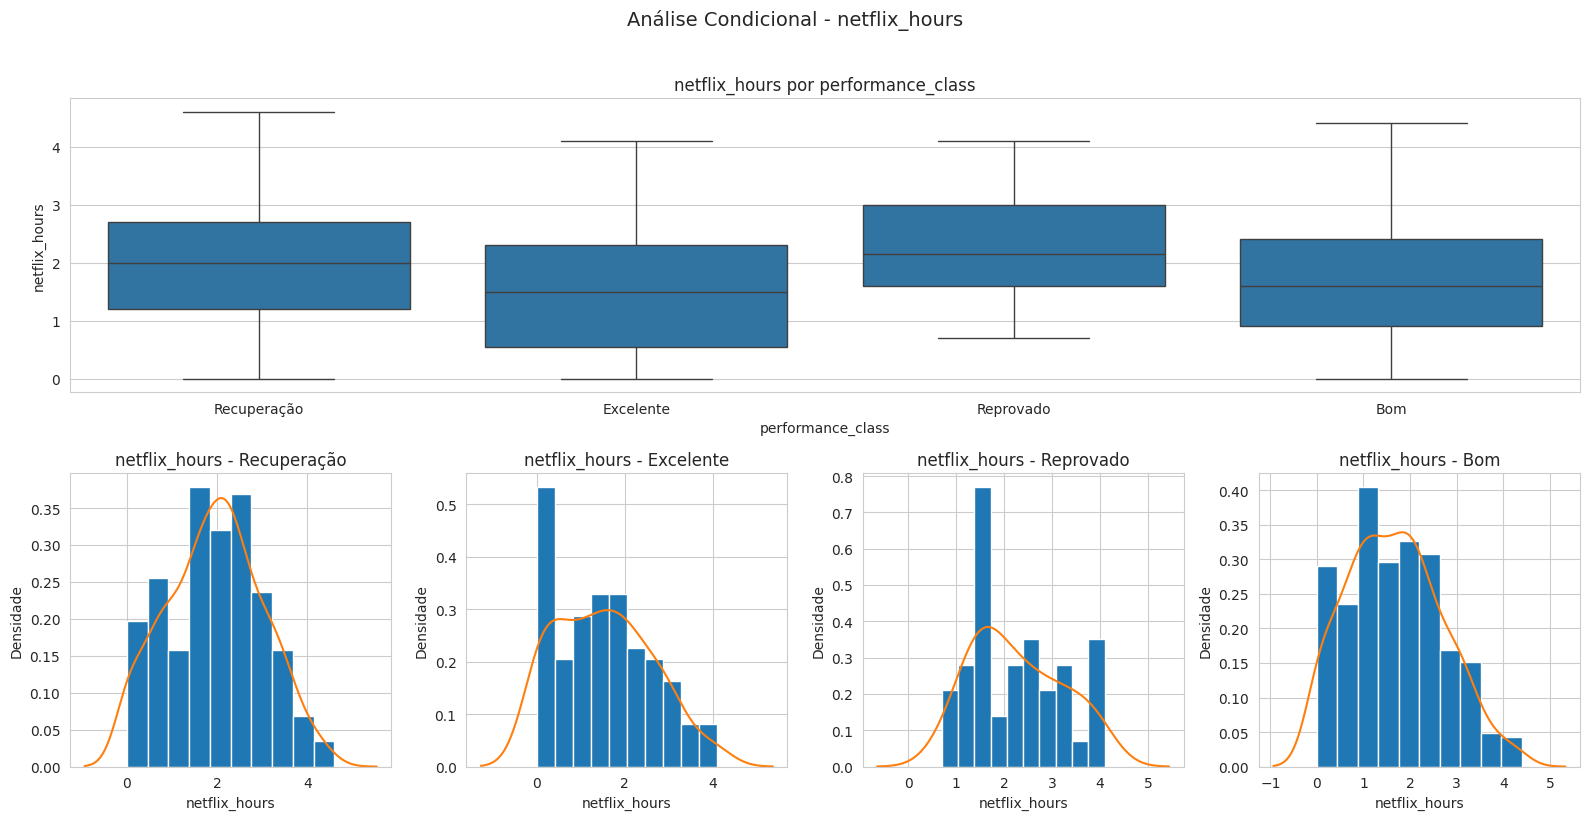

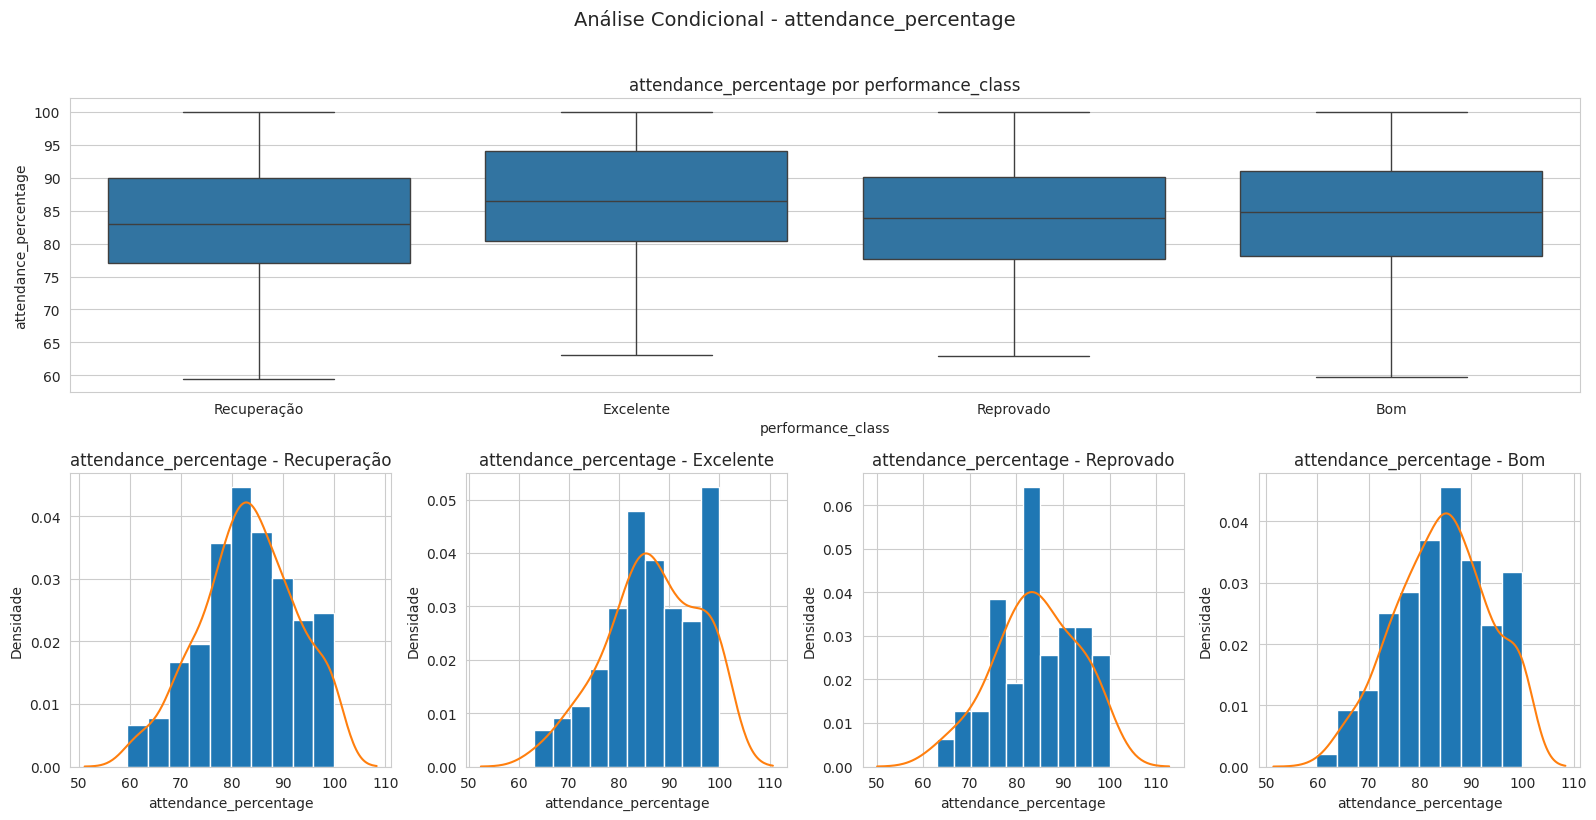

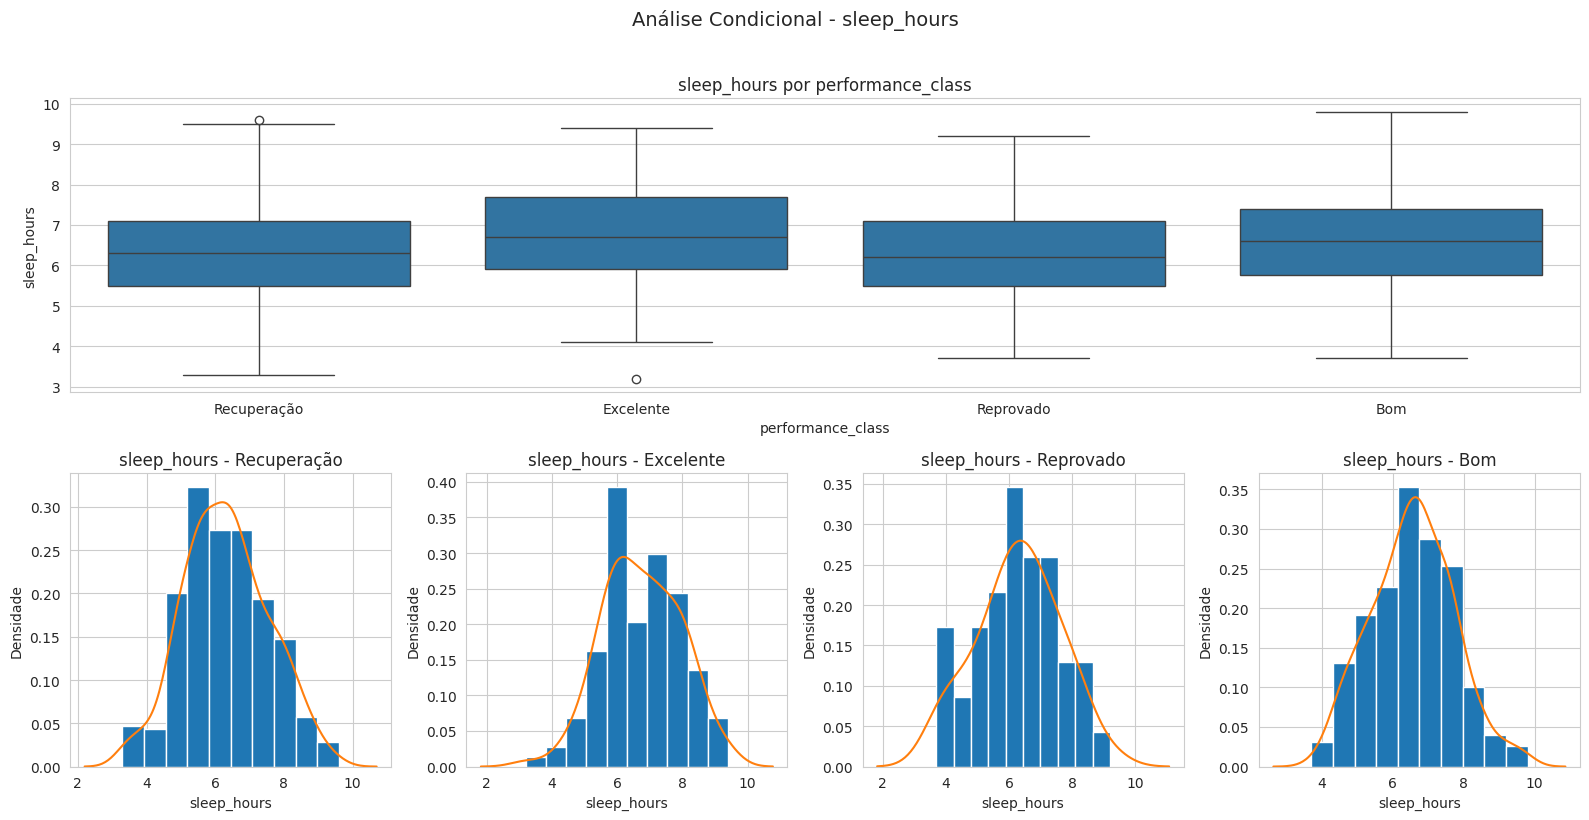

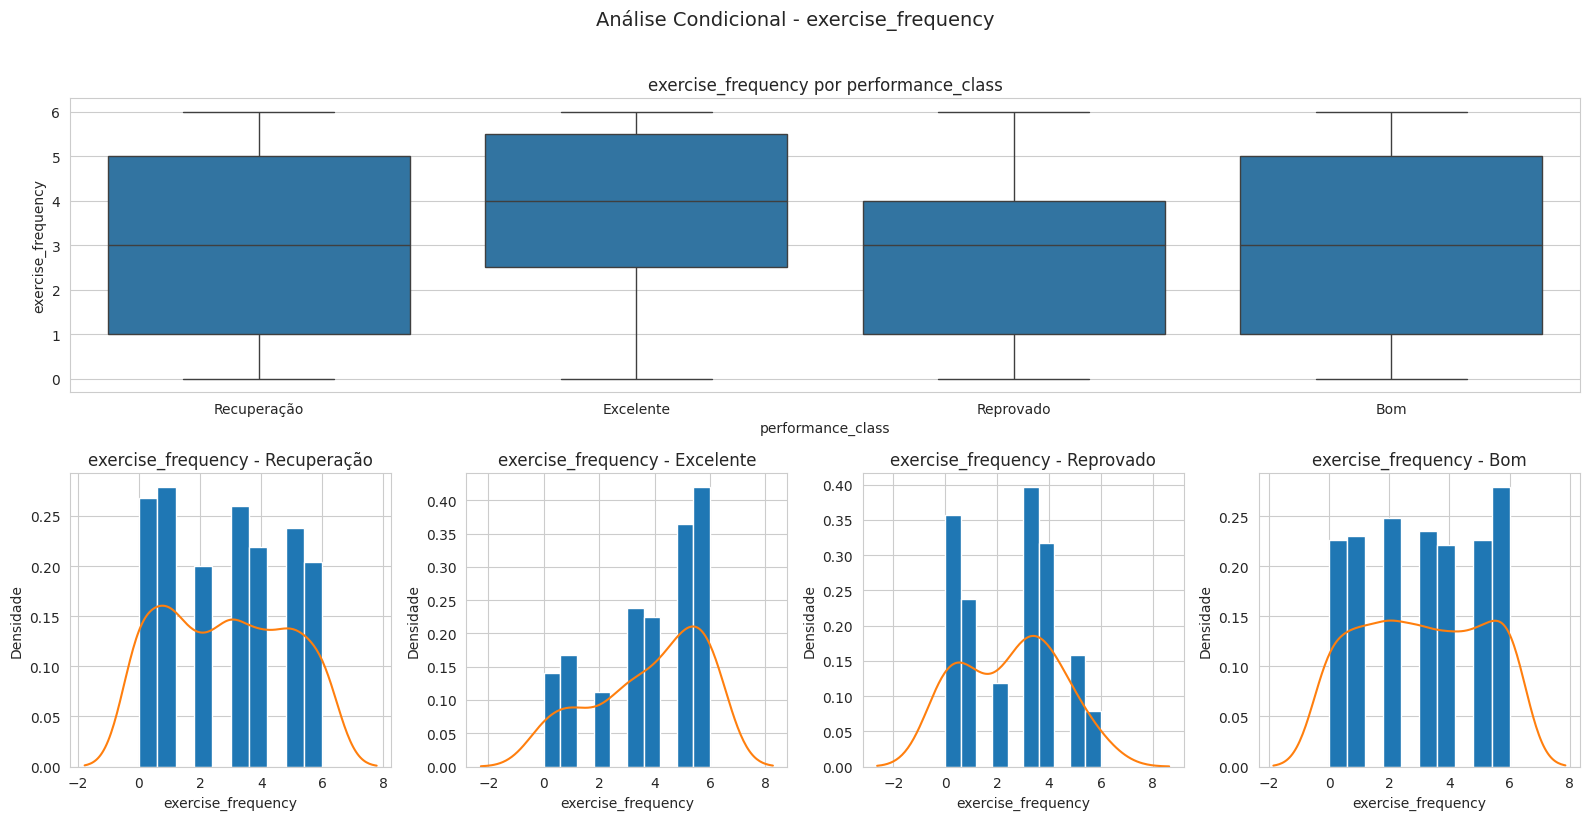

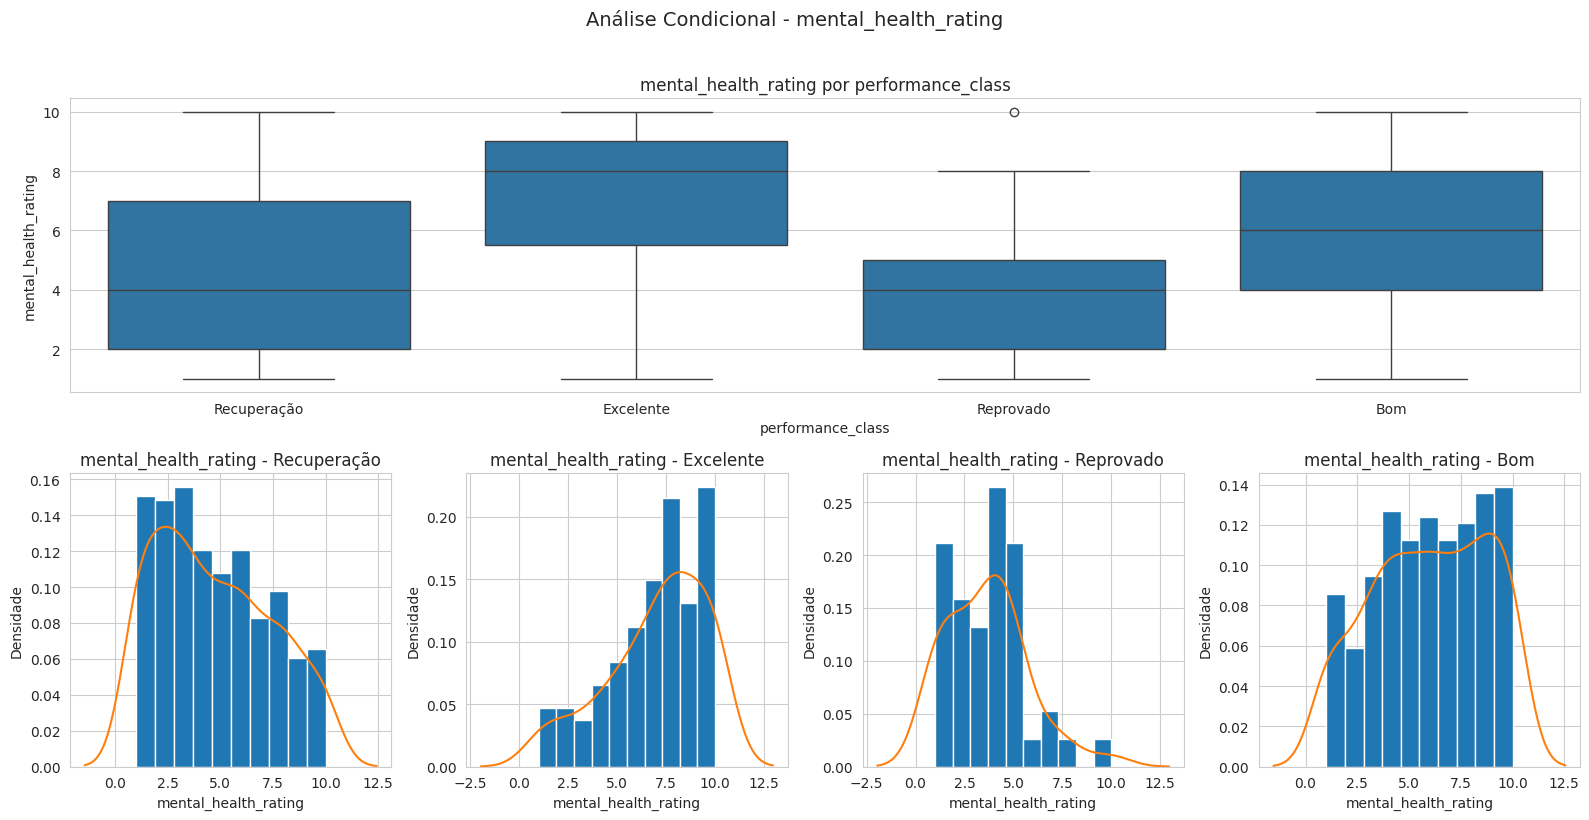

In [12]:
print(f"\n[GRÁFICOS] Matriz de Boxplots e Histogramas Condicionais (Variáveis Quantitativas vs performance_class):")
au.plot_matriz_condicional_quantitativa(df_limpo, quantitativas, 'performance_class')

Com esses gráficos obtidos, percebemos então que para:

- **age**

A idade dos alunos é bem parecida entre as classes, sem diferença significativa, não parece influenciar muito o desempenho, poderíamos até mencionar a existência de alguns picos em 20 anos mas isso é entendível já que existe esse mesmo pico na distribuição das idades.

- **study_hours_per_day**

Estudantes com melhor desempenho costumam estudar mais horas por dia, enquanto os com notas mais baixas estudam bem menos. Mostra uma relação direta entre tempo de estudo e performance (o que faz sentido no mundo real), essa é a variável que mais conseguimos melhor vizualizar uma correlação de quanto mais estudar -> mais chances de ser um aluno excelente.

- **social_media_hours**

O tempo em redes sociais é um pouco maior entre os reprovados e em recuperação, mas no geral não muda muito entre as classes.

- **netflix_hours**

Segue o mesmo padrão das redes sociais: quem tem desempenho melhor tende a assistir menos, mas ainda assim há variação.

- **attendance_percentage**

A presença em aula tem um certo impacto, mesmo que não pareça tanto os alunos com melhor desempenho frequentam mais aulas, enquanto os reprovados têm mais faltas. Vemos isso percebendo que a "montanha" do KDE está mais para a esquerda nas categorias de reprovado e recuperação. Mas uma coisa que se destaca é a alta densidade de presença (100%) nos alunos que têm desempenho excelente, o que faz sentido a pessoa que tem um desempenho excelente tem mais chances de ter 100% de presença.

- **sleep_hours**

Todos dormem entre 6 e 8 horas, mas os que têm melhor performance dormem um pouco mais, o que faz sentido com inúmeras pesquisas dizendo que uma boa noite de sono ajuda nos estudos (ou faz o aluno não dormir no meio da aula).

- **exercise_frequency**

Essa variável é uma das mais distribuidas, principalmente na categoria de bom e recuperação, mas notamos uma correlação entre os reprovados e alunos exclentes, aqueles que se exercitam mais costumam ter notas melhores, enquanto os reprovados aparecem com menos frequência de treino. Isso faz sentindo com inúmeras pesquisas dizendo que uma boa frequência de exercícios ajuda nos estudos.

- **mental_health_rating**

Percebemos logo de cara pelas assimetrias nos histogramas e disposição dos boxplots que estudantes com melhor saúde mental apresentam desempenho superior, mostrando uma relação direta entre bem-estar psicológico e resultados acadêmicos.

### Links de Pesquisa

[Por que dormir deveria ser a prioridade de todo estudante - BBC News Brasil](https://www.bbc.com/portuguese/vert-fut-45765704)

[Como a atividade física protege o cérebro? - Governo Federal](https://www.gov.br/saude/pt-br/assuntos/saude-brasil/eu-quero-me-exercitar/noticias/2022/como-a-atividade-fisica-protege-o-cerebro)

# 8. Análise Univariada Condicional Quanlitativa

Agora, vamos fazer finalmente a condicionada qualitativa usando countplots no lugar do barplot que foi feito na incondicional, devido a sua facilidade de mostrar as divisões categóricas.


[GRÁFICOS] Matriz de Gráficos de Contagem Condicionais (Variáveis Qualitativas vs performance_class):


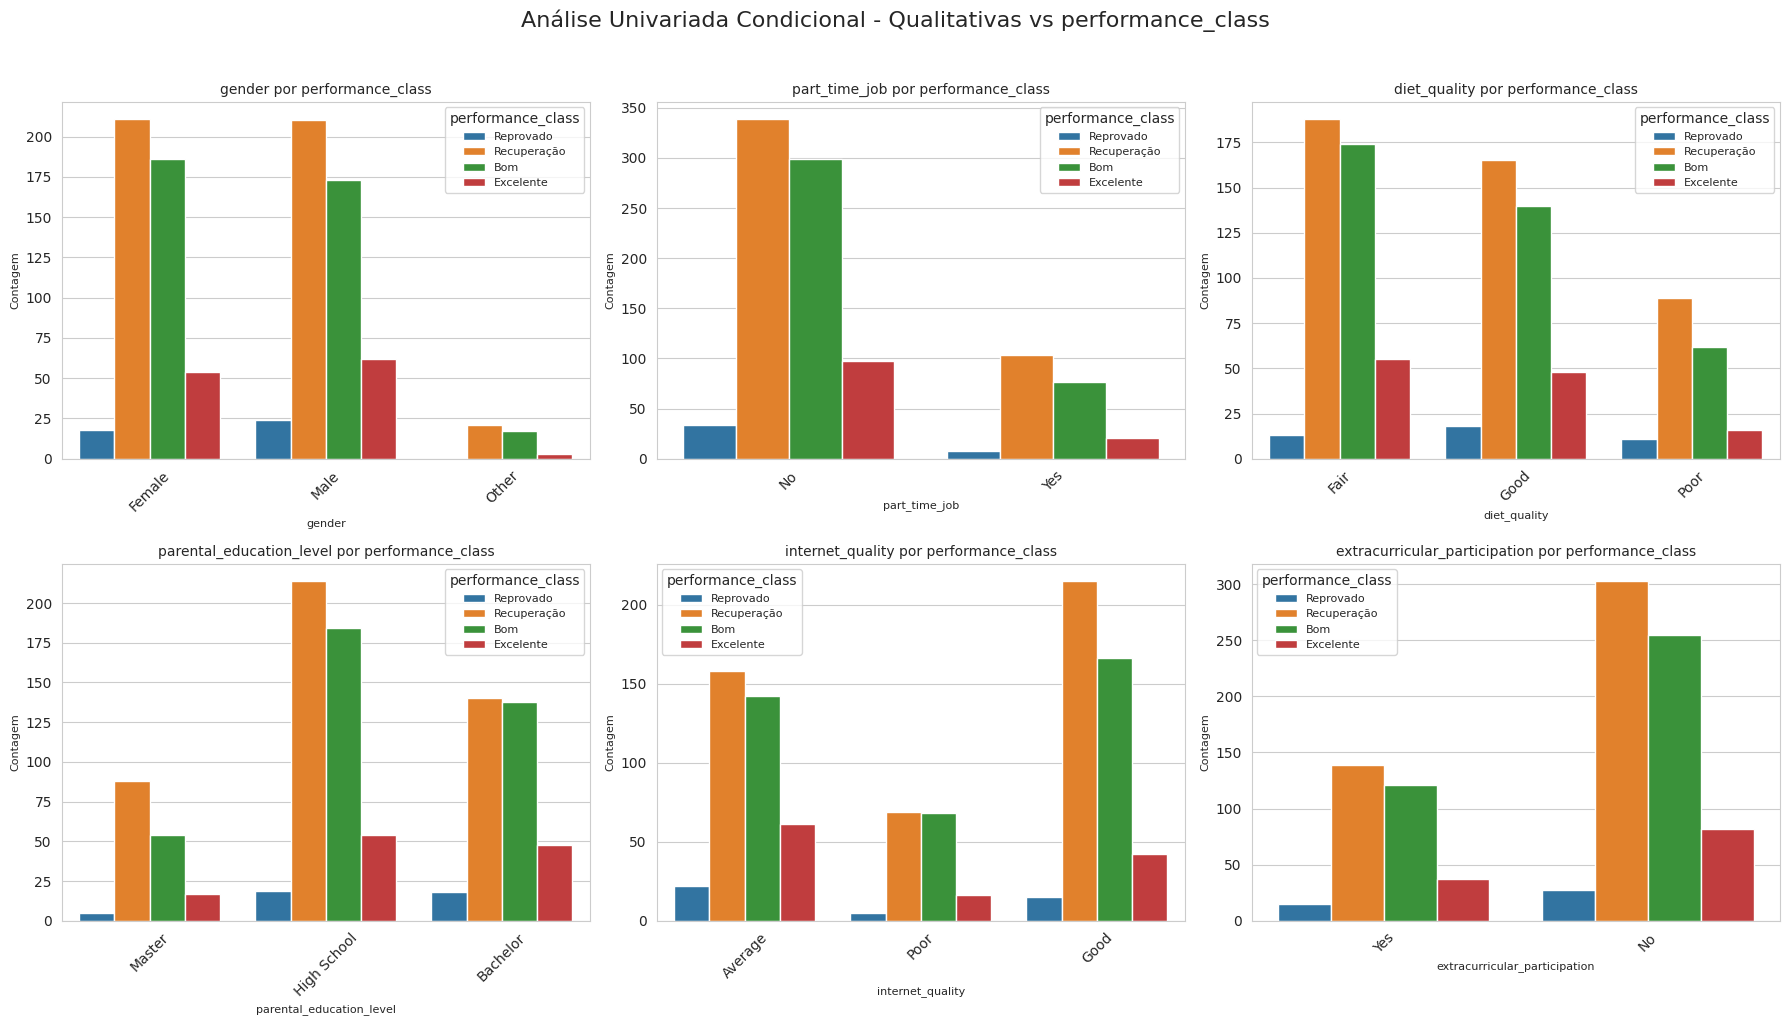

In [13]:
print(f"\n[GRÁFICOS] Matriz de Gráficos de Contagem Condicionais (Variáveis Qualitativas vs performance_class):")
au.plot_matriz_condicional_qualitativa(df_limpo, qualitativas, 'performance_class')

Com esses gráficos obtidos, percebemos então que para:

- **gender**

A distribuição do desempenho é bem parecida entre Female e Male. As proporções de Bom, Recuperação e Excelente são quase idênticas nos dois grupos, sugerindo que o gênero não é um grande diferencial aqui, um detalhe é a não presença de reprovações entre aqueles que têm outro genêro além de feminino e masculino.

- **part_time_job**

Aqui temos um certa semelhança entre a configuração das barras entre os que têm emprego e os que não têm, mas ainda sim podemos ver que a soma dos que ficaram de recuperação ou foram reprovados é maior do que aqueles que foram bons ou excelentes nos que têm emprego, mostrando que ter emprego pode ser um fator que tire o foco dos estudos .

- **diet_quality**

A qualidade da dieta também mostra uma tendência. Fair e Good têm distribuições de notas parecidas, contudo, no grupo Poor, a performance excelente cai e o tamanho da barra de reprovado é quase a mesma das outras categorias mesmo a quantidade de pessoas com dieta Poor sendo menor, ou seja, temos uma proporção maior de reprovados nesse grupo de pessoas com qualidade ruim, o que faz sentido no mundo real já que precisamos de nutrientes e vitaminas para nosso corpo e mente funcionar.

- **parental_education_level**

Podemos perceber que os alunos que têm pais com bacharelado possuem uma proporção maior de alunos bons e excelentes quando comparado aos que têm mestrado e ensino médio. Isso pode indicar uma possível familiaridade dos pais com bacharel que têm filhos também na graduação (faixa etária deste dataset sendo de alunos universitários), ou seja, os outros, não tiveram contanto com a graduação no caso dos que só têm ensino médio, ou já estão numa etapa além e distantes da graduação no caso dos que têm mestrado.

- **internet_quality**

A internet parece não afetar tanto assim quanto as outras variáveis e vemos isso até pela proporção igual de bons e em recuperação pra quem tem uma internet de qualidade Poor, mas ainda sim podemos perceber uma maior prpoporção de excelentes nas barras de quem tem a internet de qualidade Average quando comparada a de qualidade Poor.

- **extracurricular_participation**

Participar de atividades extracurriculares (Yes) parece estar associado a um desempenho melhor já que a diferença entre os bons e os que estão em recuperação é menor nos que estão em uma atividade extracurricular, mas fora isso o formato das barras é um pouco parecido.

# 9 Resumo Final

--- 1. Análise Univariada Incondicional (Distribuição Pura) ---

[TABELA] Estatísticas Descritivas para Variáveis Quantitativas:


,Contagem,Mínimo,Máximo,Média,Mediana,Desvio Padrão,Assimetria
age,979.0,17.0,24.0,20.501532,20.0,2.309567,0.004524
study_hours_per_day,979.0,0.0,7.3,3.520327,3.5,1.439092,-0.053408
social_media_hours,979.0,0.0,5.6,2.483146,2.5,1.149425,0.000016
netflix_hours,979.0,0.0,4.6,1.803984,1.8,1.057254,0.168719
attendance_percentage,979.0,59.5,100.0,84.127681,84.3,9.314441,-0.187444
sleep_hours,979.0,3.2,9.8,6.463841,6.5,1.220036,0.055033
exercise_frequency,979.0,0.0,6.0,3.036772,3.0,2.025572,-0.026471
mental_health_rating,979.0,1.0,10.0,5.436159,5.0,2.853757,0.037740



[TABELAS] Estatísticas Descritivas para Variáveis Qualitativas (Contagem e Proporção):

Variável: gender


,Contagem,Proporção (%)
gender,,
Female,469,47.906027
Male,469,47.906027
Other,41,4.187947



Variável: part_time_job


,Contagem,Proporção (%)
part_time_job,,
No,770,78.651685
Yes,209,21.348315



Variável: diet_quality


,Contagem,Proporção (%)
diet_quality,,
Fair,430,43.922370
Good,371,37.895812
Poor,178,18.181818



Variável: parental_education_level


,Contagem,Proporção (%)
parental_education_level,,
High School,471,48.110317
Bachelor,344,35.137896
Master,164,16.751788



Variável: internet_quality


,Contagem,Proporção (%)
internet_quality,,
Good,438,44.739530
Average,383,39.121553
Poor,158,16.138917



Variável: extracurricular_participation


,Contagem,Proporção (%)
extracurricular_participation,,
No,667,68.130746
Yes,312,31.869254



[GRÁFICOS] Matriz de Gráficos Univariados Quantitativos (Histograma e Boxplot):


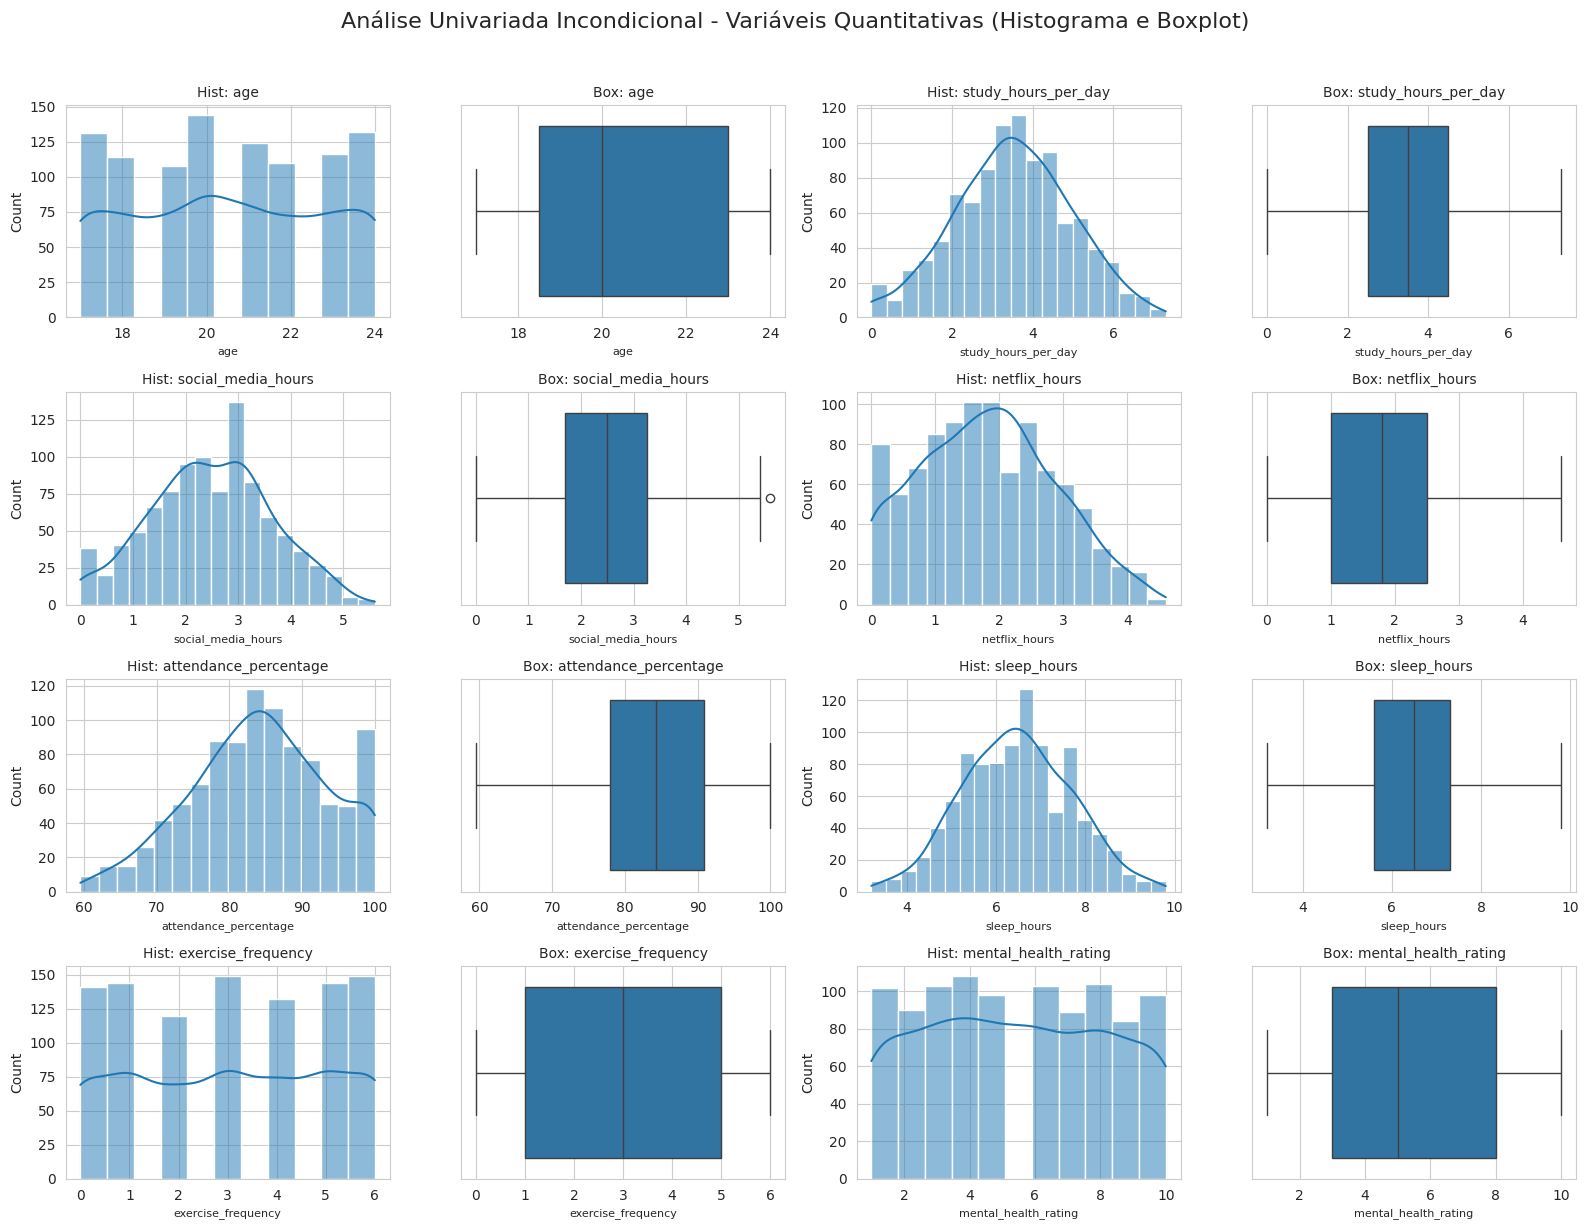


[GRÁFICOS] Matriz de Gráficos Univariados Qualitativos (Gráfico de Barras):


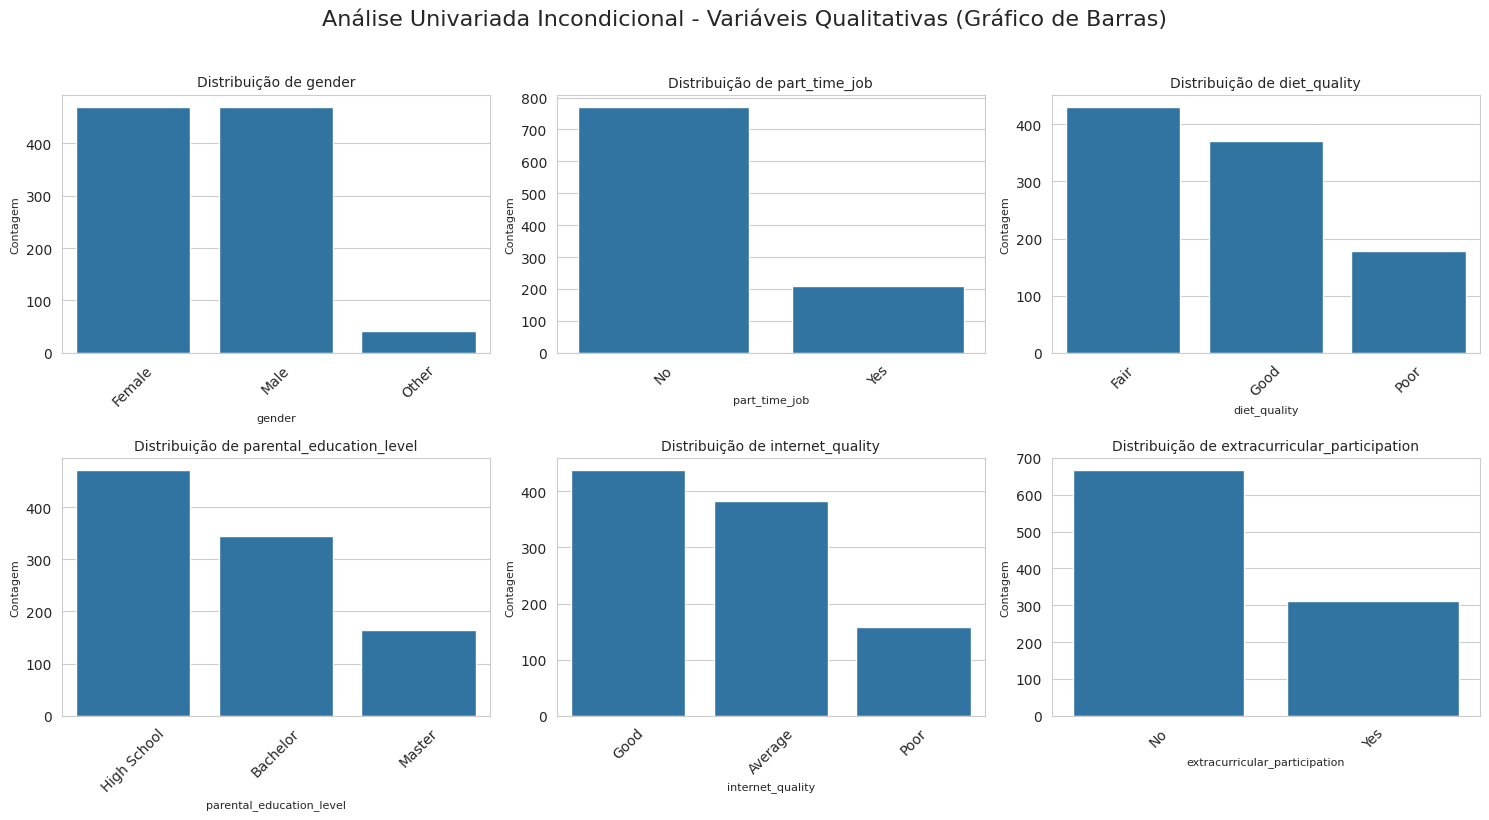


--- 2. Análise Univariada Condicional (Relação com a Variável Alvo) ---

[GRÁFICOS] Matriz de Boxplots Condicionais (Variáveis Quantitativas vs performance_class):


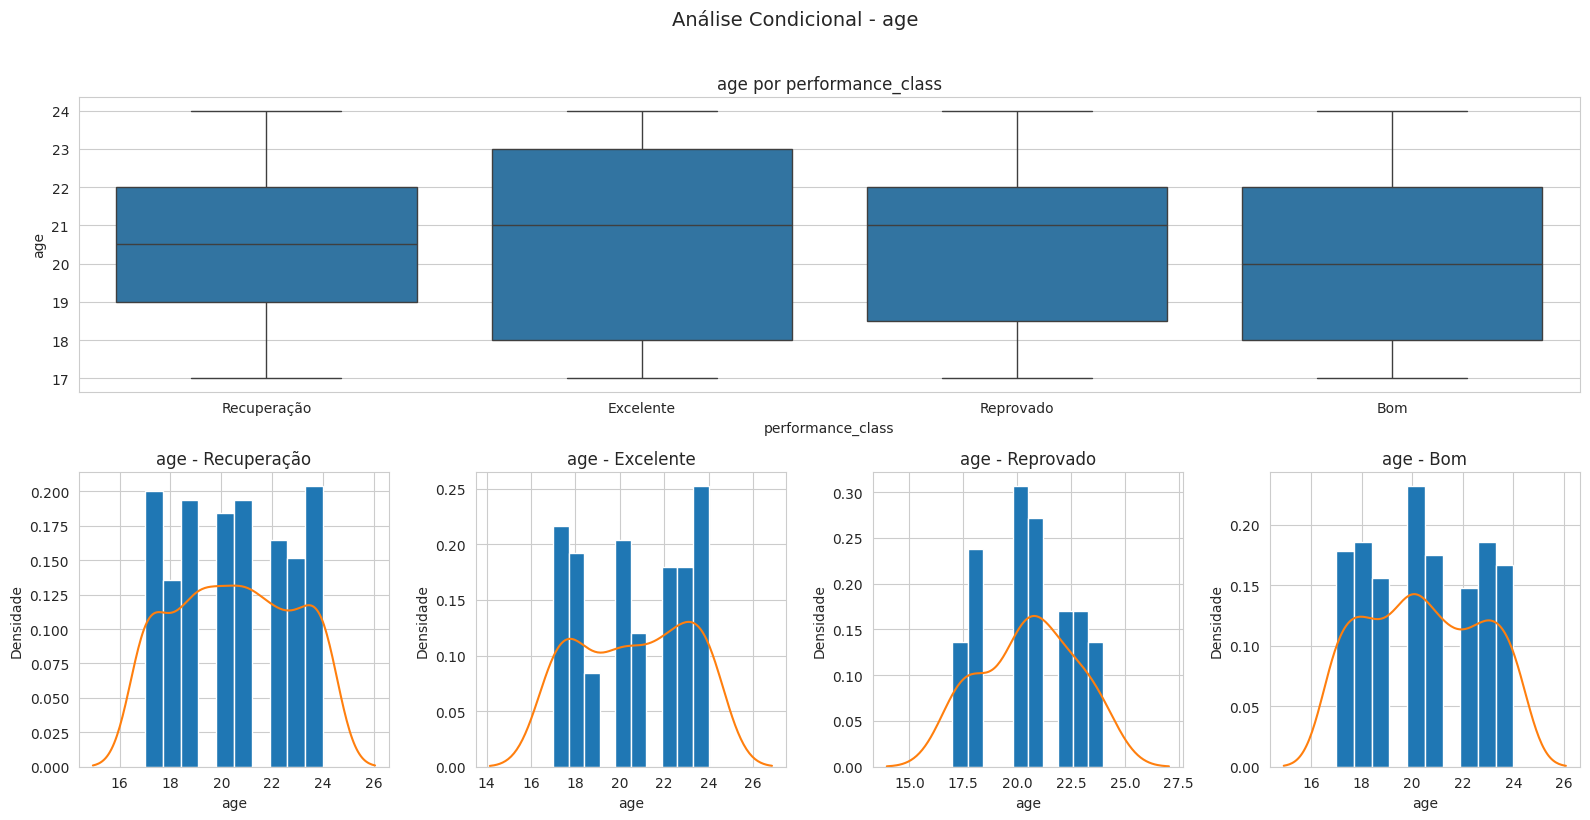

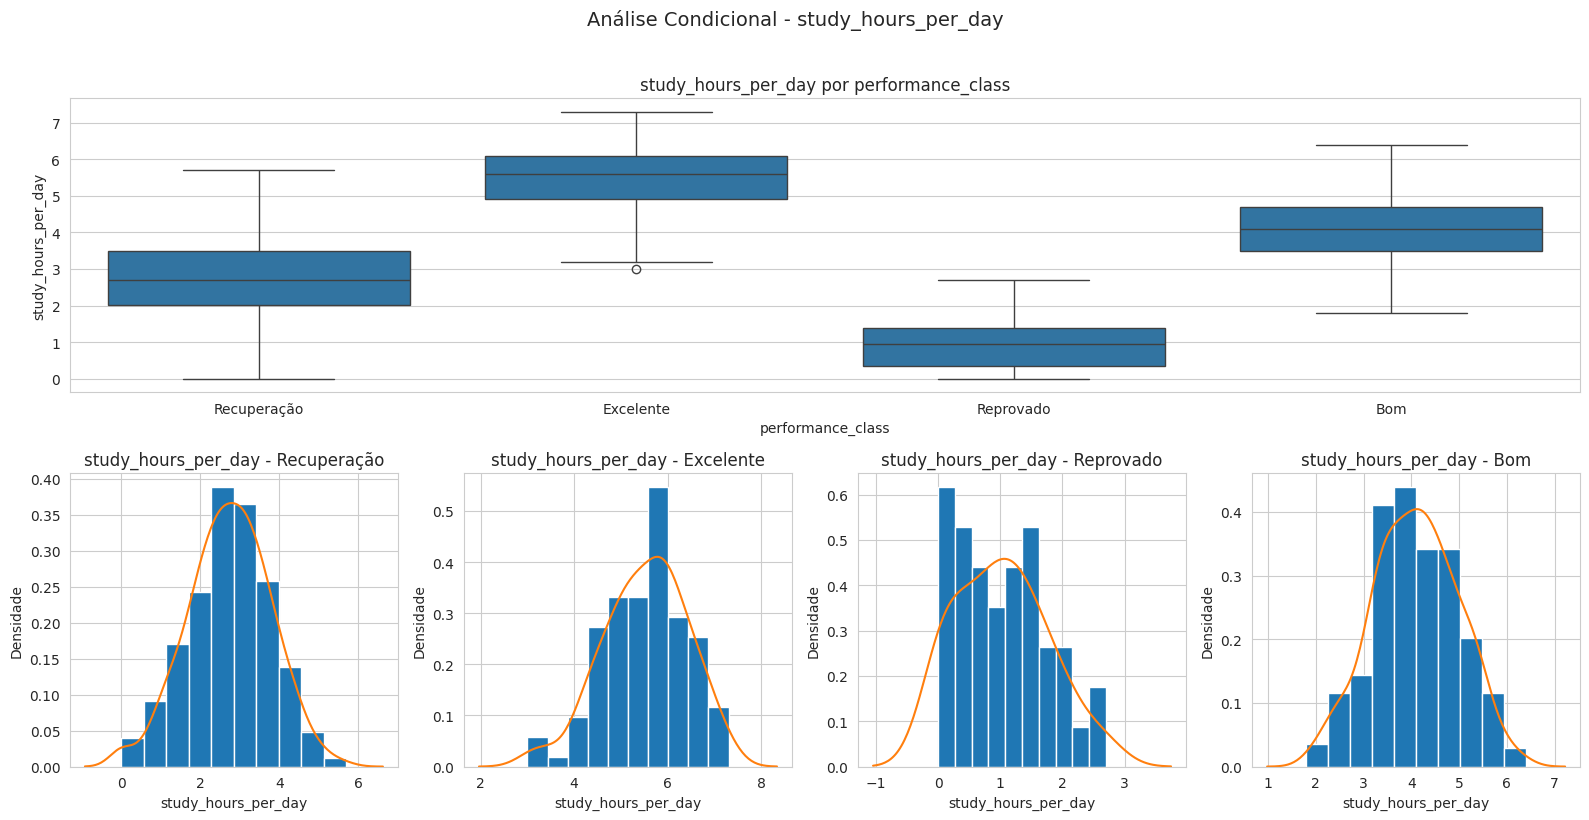

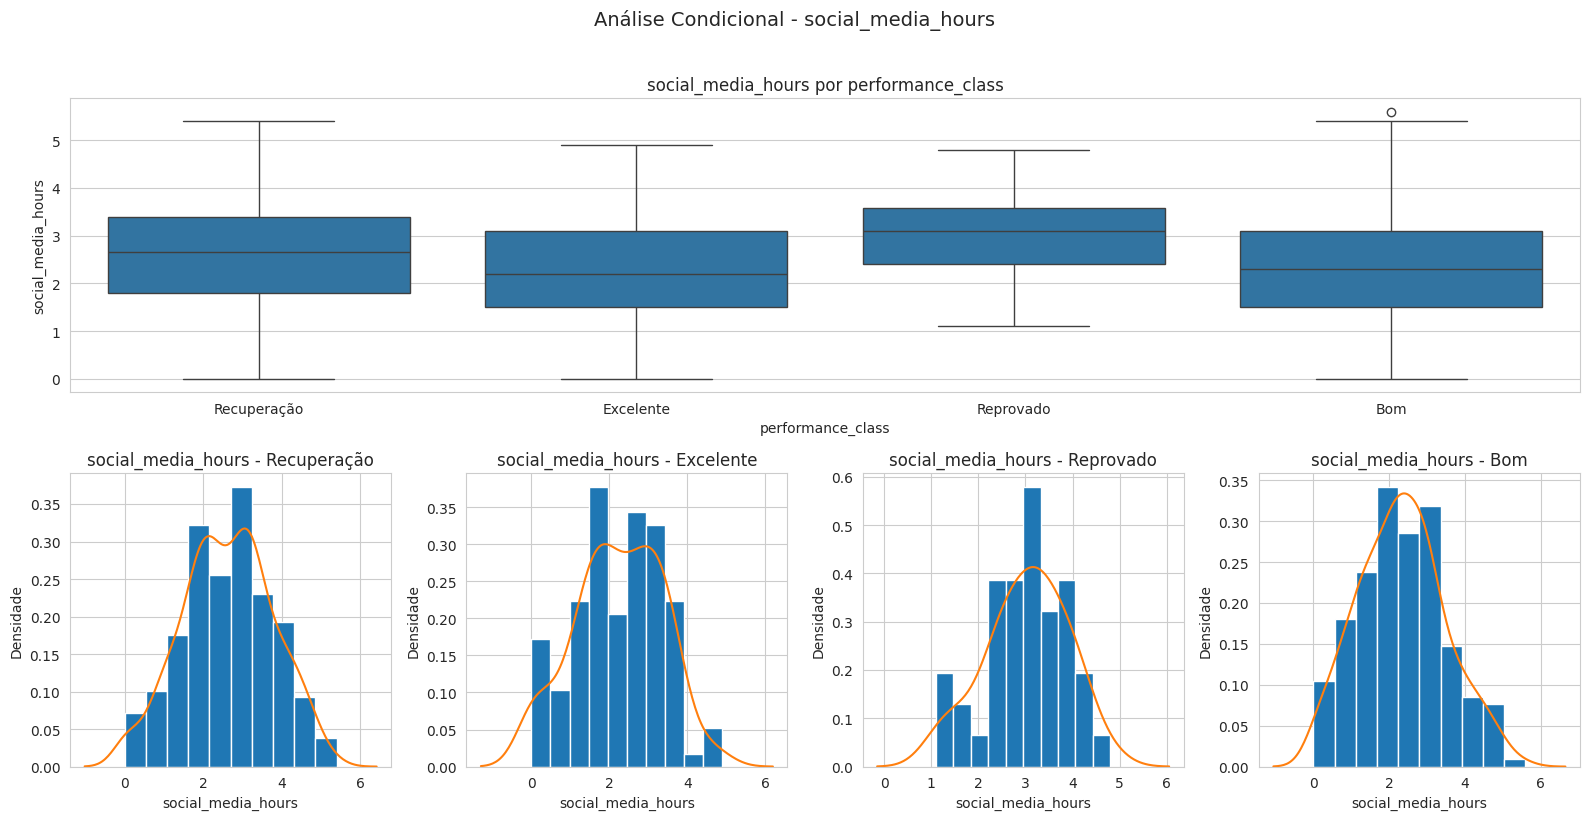

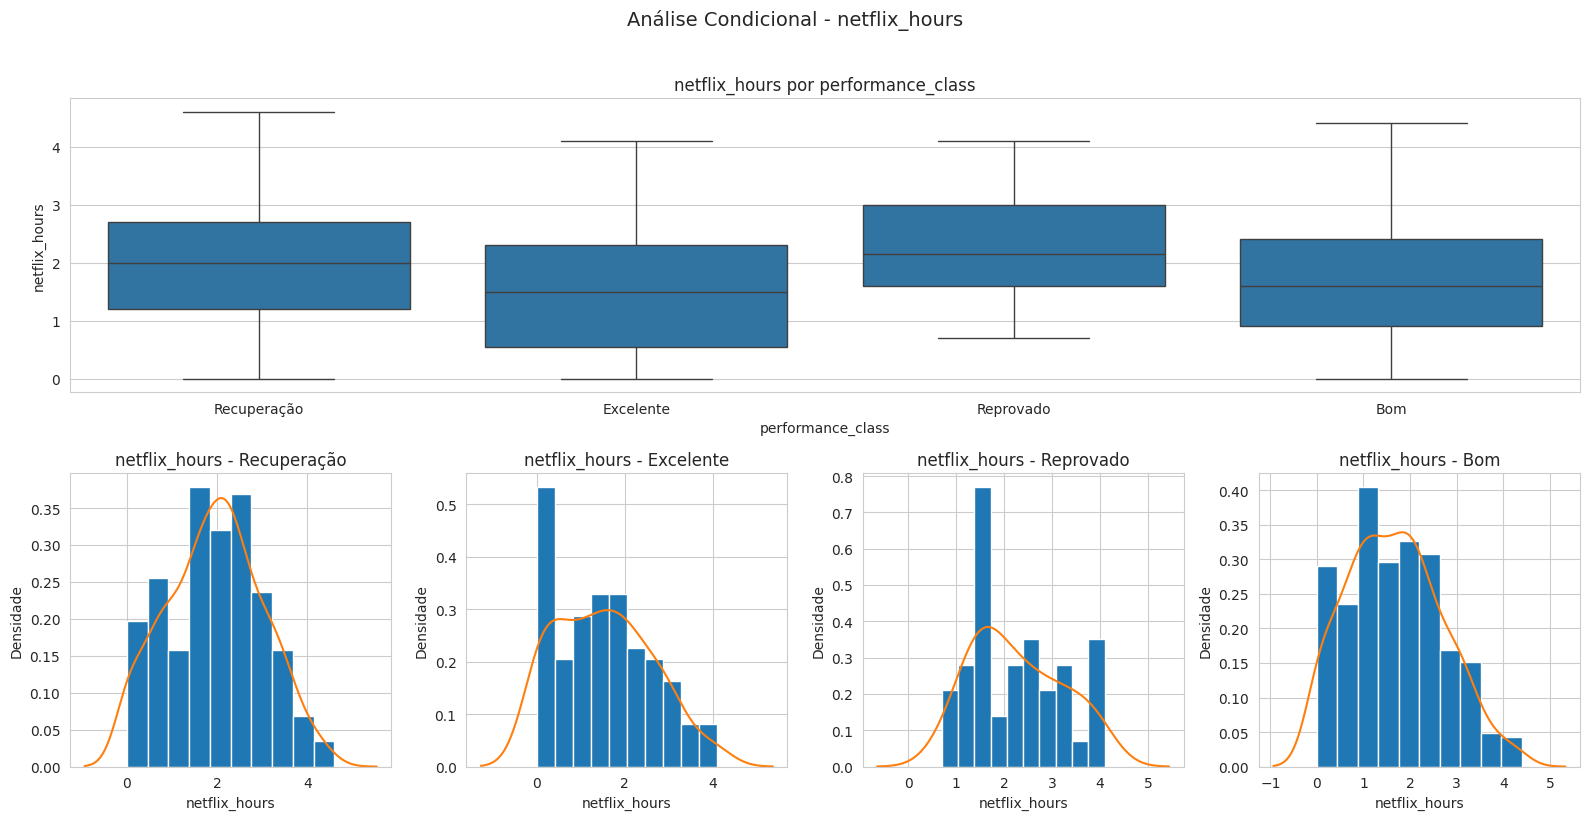

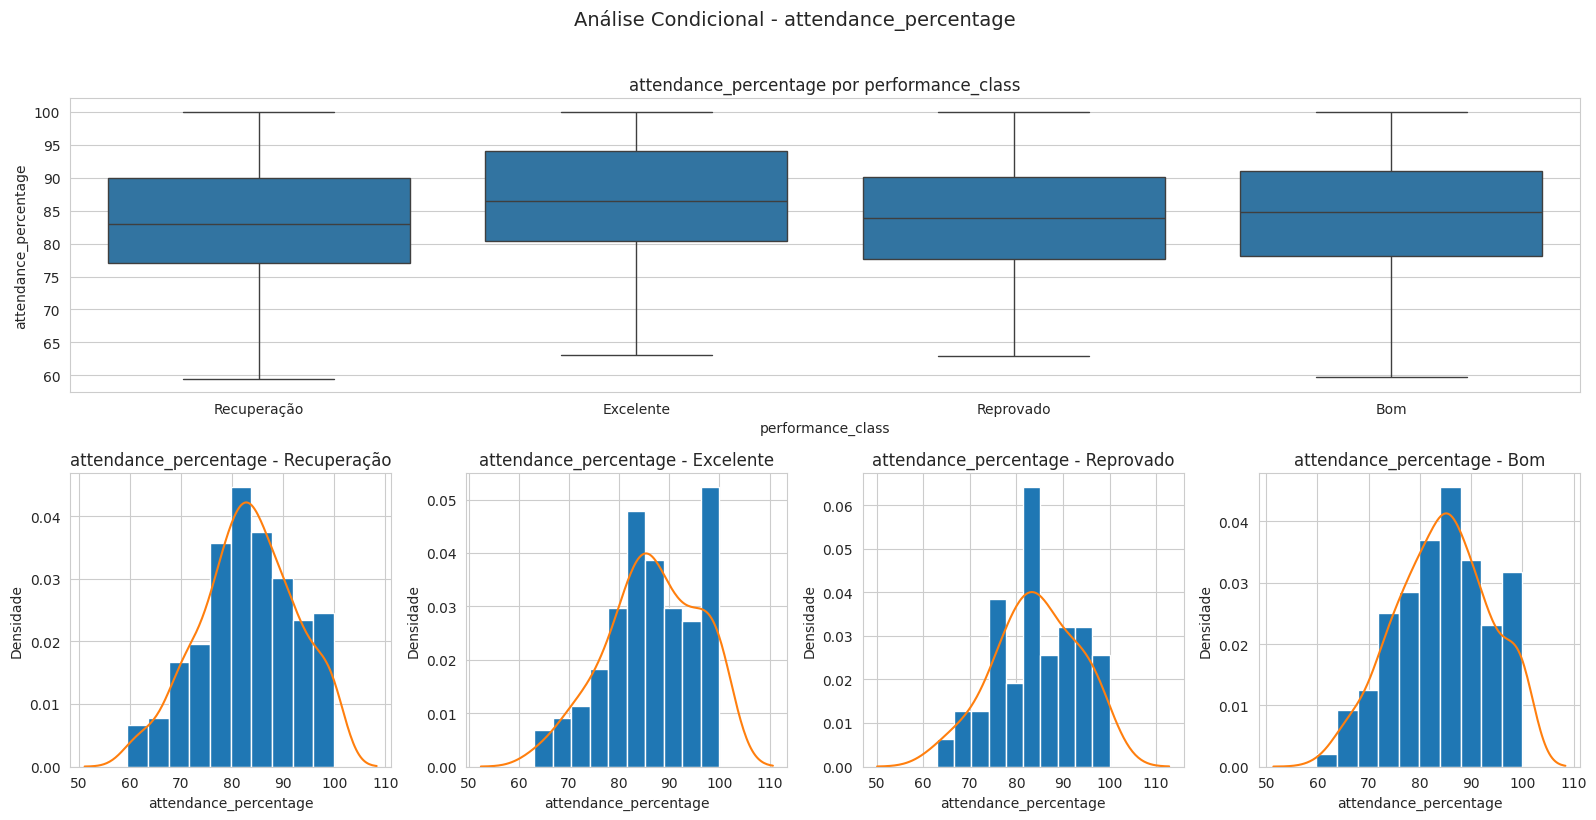

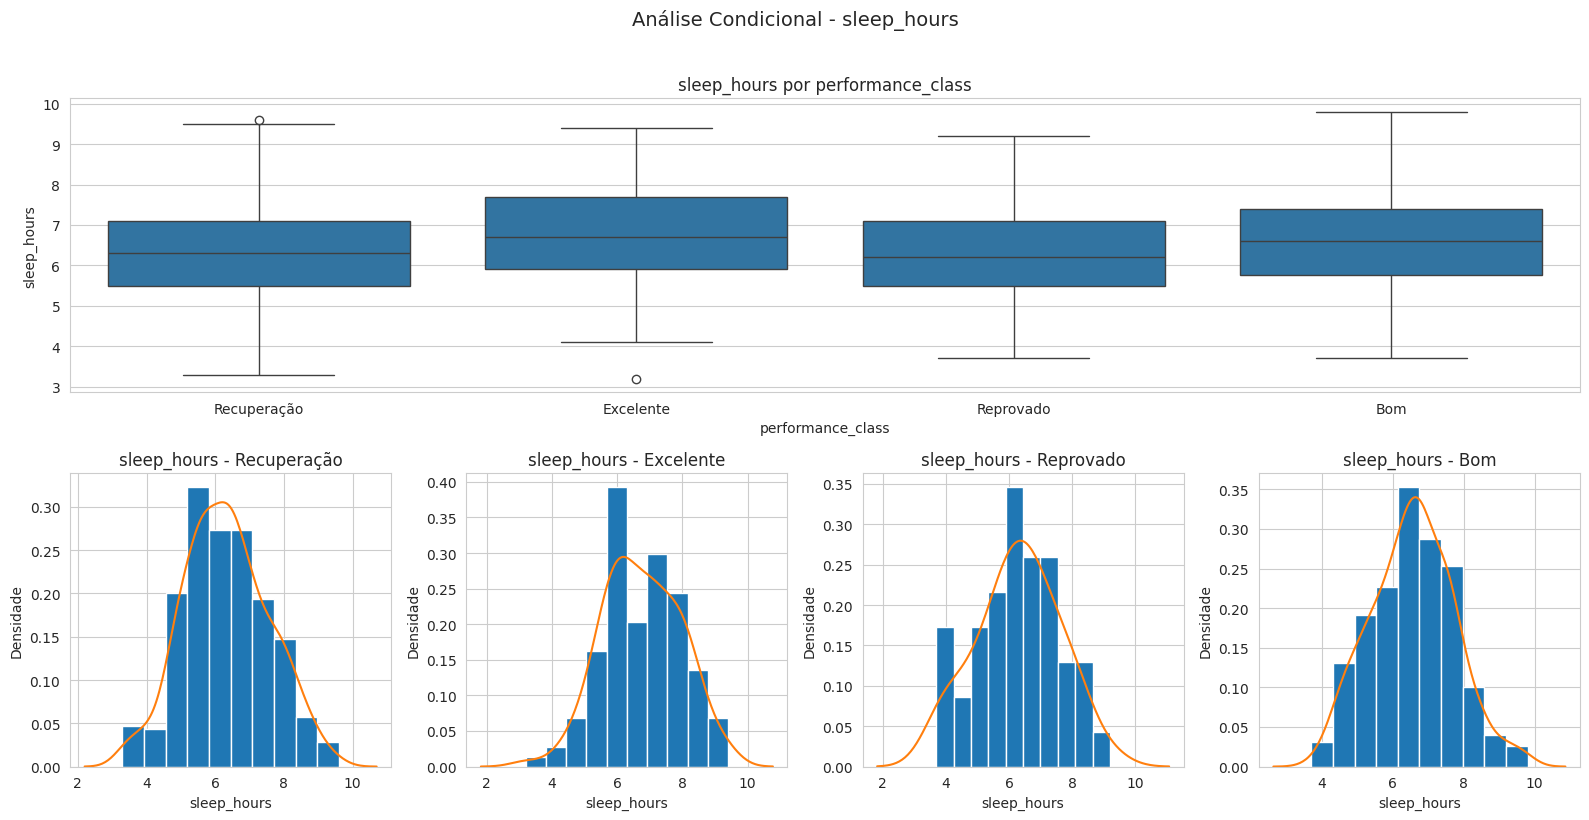

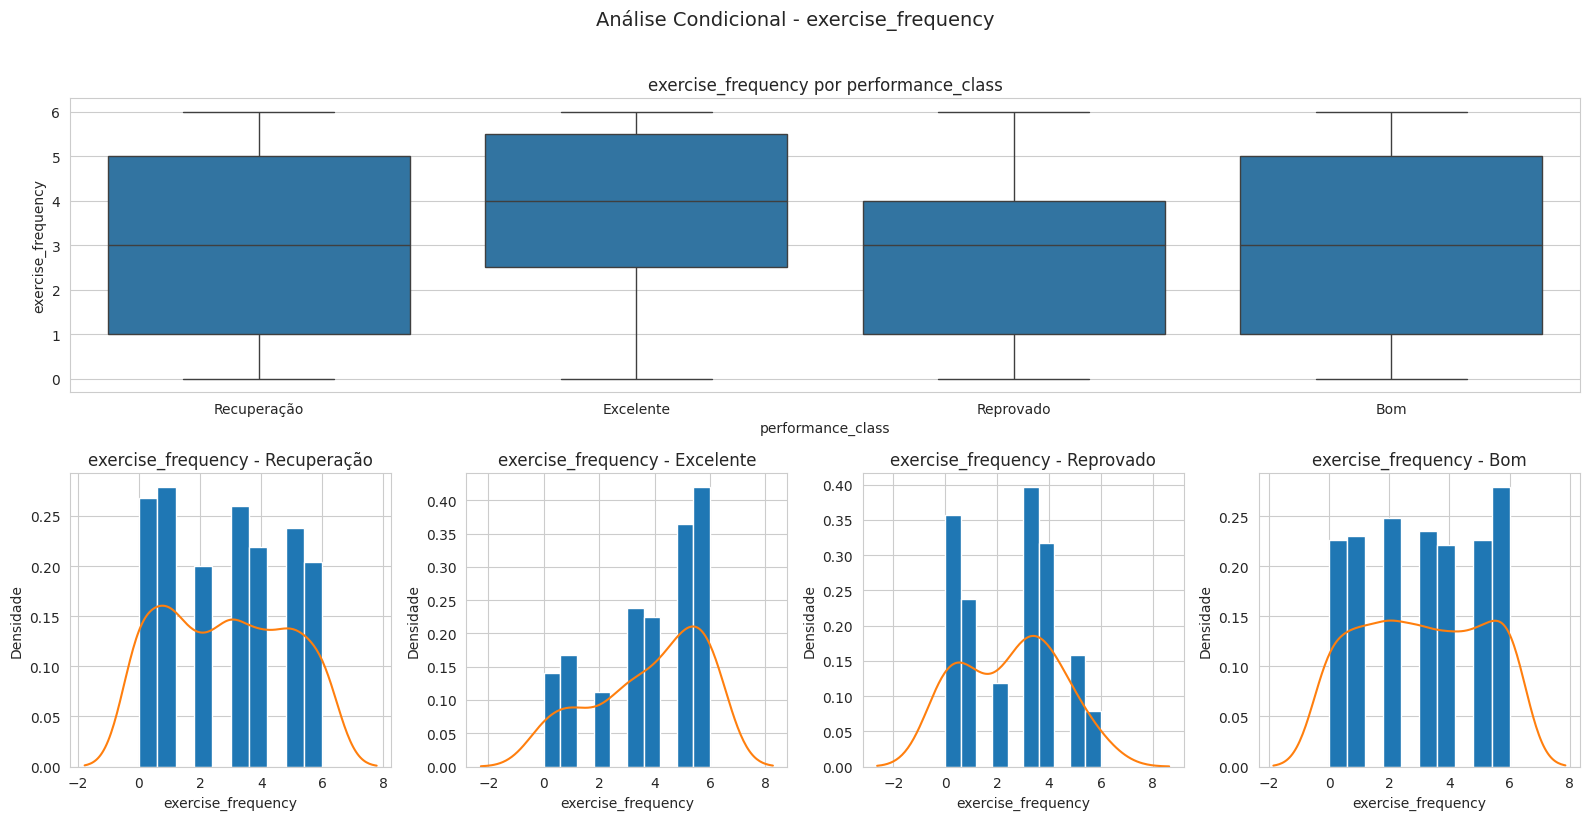

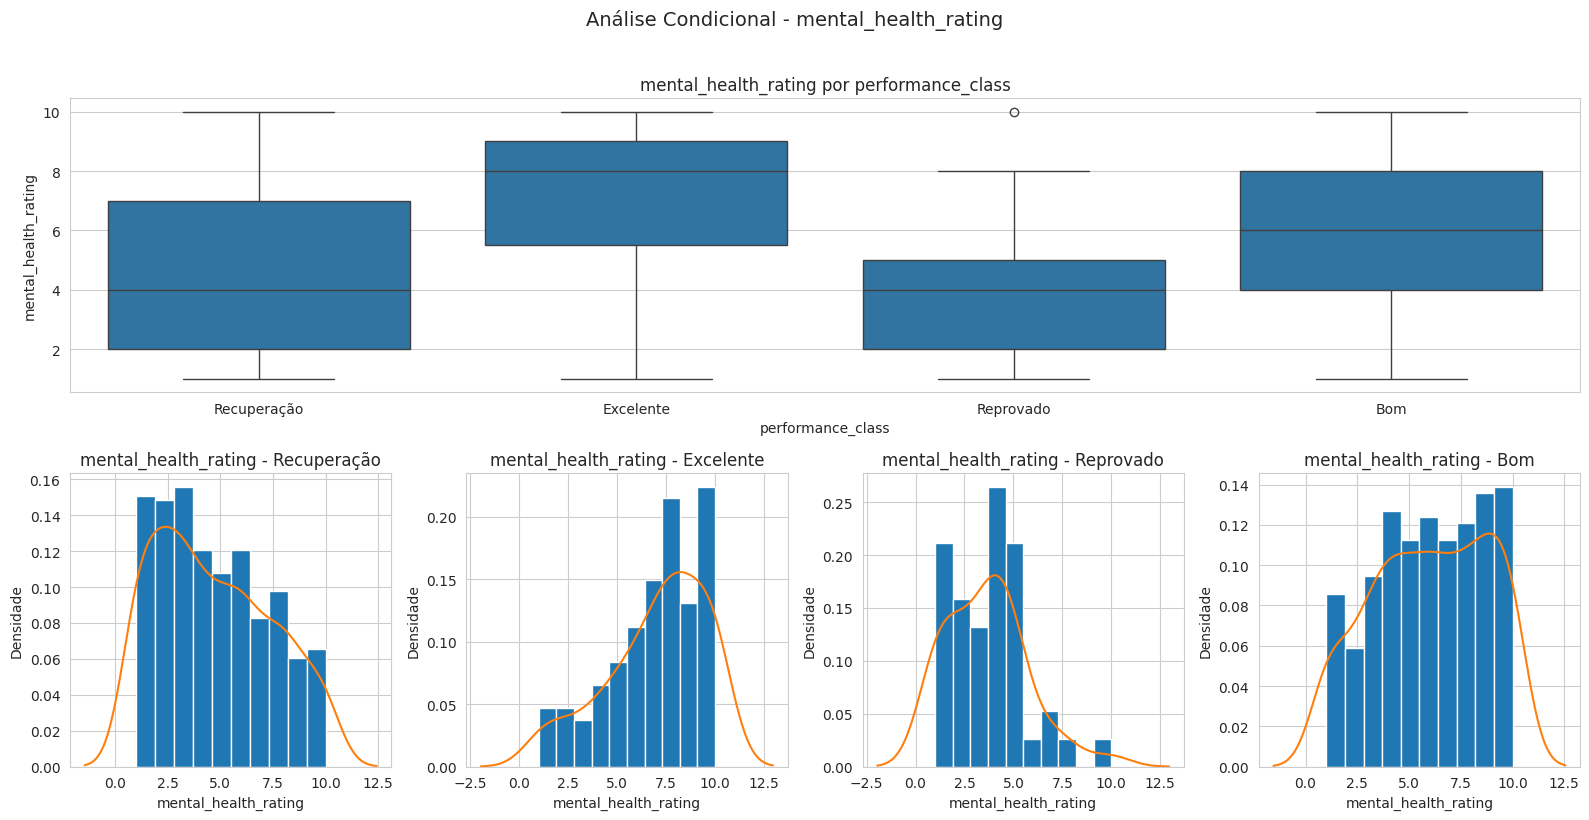


[GRÁFICOS] Matriz de Gráficos de Contagem Condicionais (Variáveis Qualitativas vs performance_class):


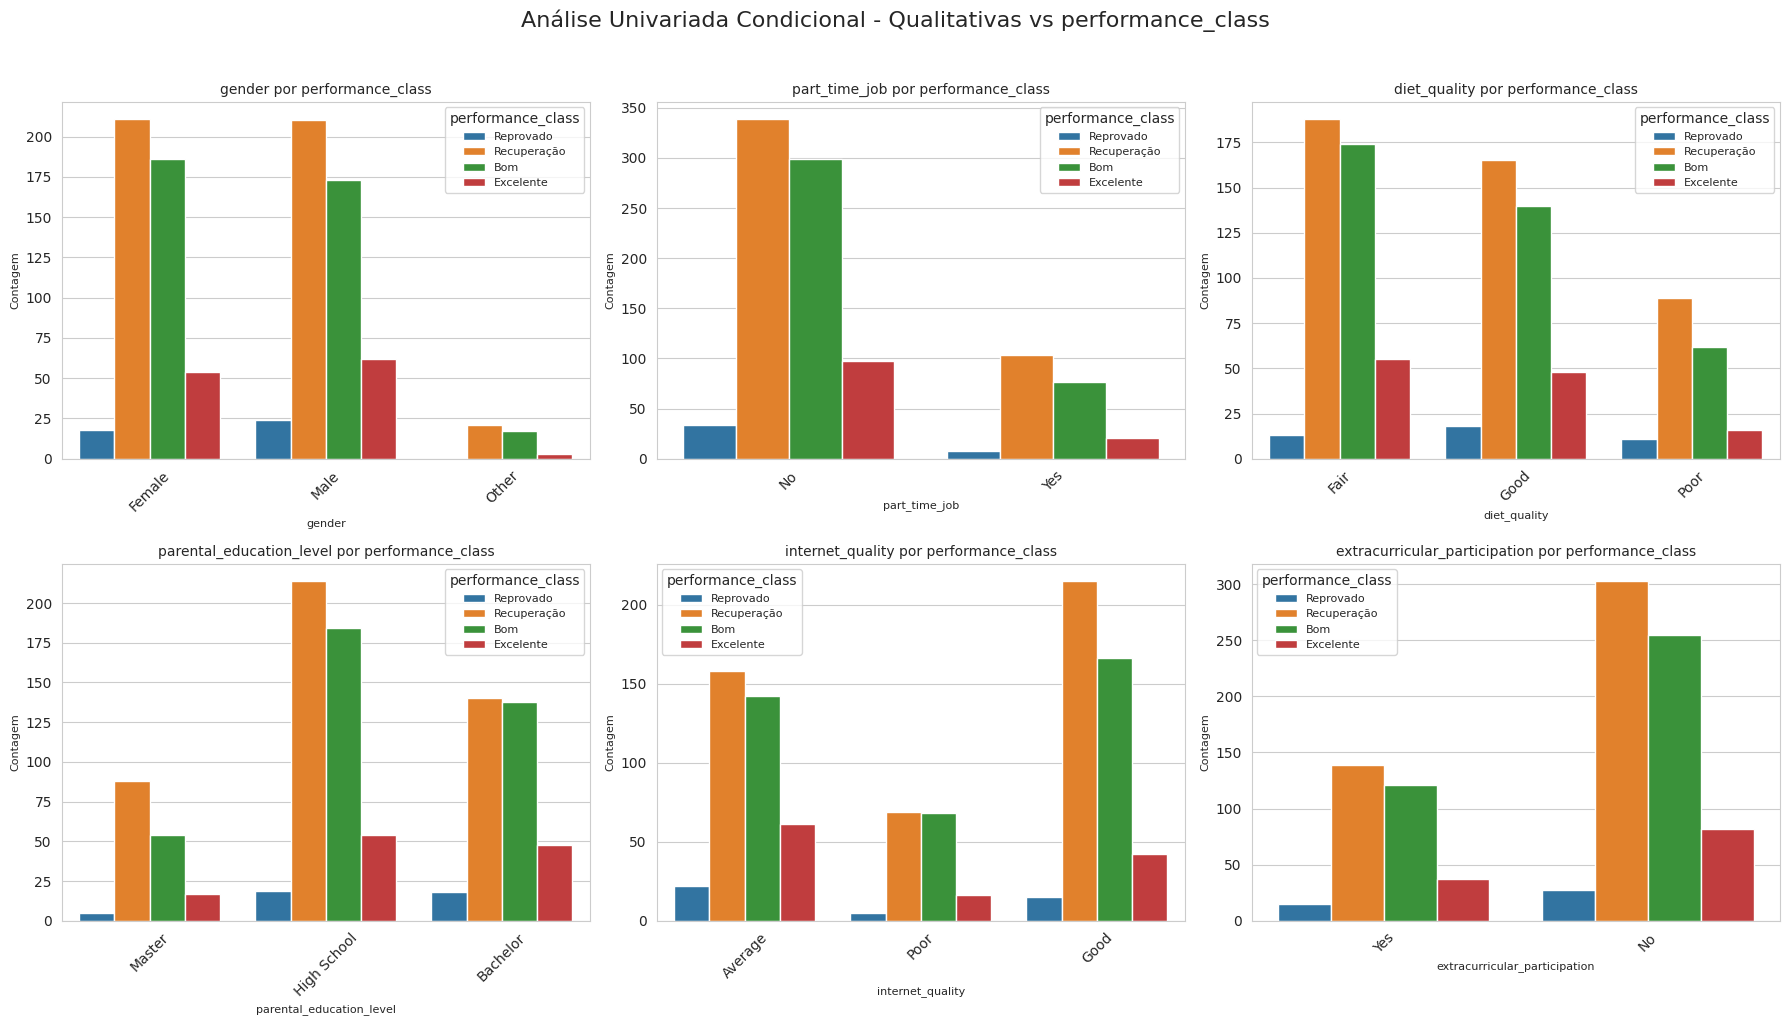

In [14]:
au.executar_analise_univariada_completa(df_limpo, df_dict)

## Conclusão da Análise Univariada

Com base na análise minuciosa de cada variável, podemos resumir as descobertas que serão cruciais para a próxima etapa:


1.  **Variáveis Chave:** (Liste as variáveis que mostraram a relação mais forte nos Boxplots/Histogramas e Countplots, como `study_hours_per_day` e `attendance_percentage`).
2.  **Variáveis de Atenção:** (Liste variáveis com alta assimetria ou *outliers* que podem precisar de tratamento, como `social_media_hours`).
3.  **Próximos Passos:** Esta análise univariada nos fornece a base para a **Análise Bivariada** e a construção do modelo preditivo, pois já sabemos quais variáveis são as mais promissoras.